# overview

Through this project, we demonstrated a comprehensive approach to time series forecasting, incorporating both traditional statistical methods and modern machine learning techniques. The key takeaways from this project are:

1. **Data Preprocessing is Crucial**:
   - Proper handling of anomalies and ensuring data stationarity are foundational steps for accurate forecasting.

2. **Model Selection**:
   - Different models have varying strengths. While SARIMA and ARIMAX effectively captured seasonal patterns, Prophet and CNN models excelled in handling complex trends and multiple seasonalities.

3. **Feature Engineering**:
   - The inclusion of lag features significantly improved the performance of ARIMAX and CNN models, highlighting the importance of feature engineering in time series forecasting.

4. **Model Evaluation**:
   - Consistent evaluation using MAE and MAPE provided clear insights into model performance, guiding the selection of the best model.


# Step 1: Preprocessing

In [16]:
import pandas as pd

# Load the dataset
student_info = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentInfo.csv")

# Encode 'code_module' to numerical values
student_info['code_module'] = student_info['code_module'].astype('category').cat.codes

# Transform 'code_presentation' into date
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_info['presentation_start'] = student_info['code_presentation'].apply(transform_presentation)
student_info['presentation_start'] = pd.to_datetime(student_info['presentation_start'])

# Drop the original 'code_presentation' column
student_info.drop(columns=['code_presentation'], inplace=True)

# Check the preprocessed dataset
print(student_info.head())
print(student_info.dtypes)

# Save the preprocessed dataset
student_info.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv", index=False)


   code_module  id_student gender                region  \
0            0       11391      M   East Anglian Region   
1            0       28400      F              Scotland   
2            0       30268      F  North Western Region   
3            0       31604      F     South East Region   
4            0       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result presentation_start  
0              240          N         Pass         2013-10-01  
1               60          N         Pass         2013-10-01  
2               60          Y    Withdrawn  

In [18]:
import pandas as pd

# Load the dataset
student_vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentVle.csv")

# Encode 'code_module' to numerical values (same encoding as Student Info)
student_vle['code_module'] = student_vle['code_module'].astype('category').cat.codes

# Transform 'code_presentation' into date (same transformation as Student Info)
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_vle['presentation_start'] = student_vle['code_presentation'].apply(transform_presentation)
student_vle['presentation_start'] = pd.to_datetime(student_vle['presentation_start'])

# Transform 'date' into actual date type
student_vle['interaction_date'] = student_vle.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)

# Drop the original 'code_presentation' and 'date' columns
student_vle.drop(columns=['code_presentation', 'date'], inplace=True)

# Check the preprocessed dataset
print(student_vle.head())
print(student_vle.dtypes)

# Save the preprocessed dataset
student_vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv", index=False)


   code_module  id_student  id_site  sum_click presentation_start  \
0            0       28400   546652          4         2013-10-01   
1            0       28400   546652          1         2013-10-01   
2            0       28400   546652          1         2013-10-01   
3            0       28400   546614         11         2013-10-01   
4            0       28400   546714          1         2013-10-01   

  interaction_date  
0       2013-09-21  
1       2013-09-21  
2       2013-09-21  
3       2013-09-21  
4       2013-09-21  
code_module                     int8
id_student                     int64
id_site                        int64
sum_click                      int64
presentation_start    datetime64[ns]
interaction_date      datetime64[ns]
dtype: object


In [ ]:
import pandas as pd

# Load the dataset
student_assessment = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentAssessment.csv")

# Transform 'date_submitted' into actual date type
# First, we need to add 'code_module' and 'code_presentation' columns similar to student_info and student_vle for consistency

# these columns should be added from another dataset, let's add them as categories
student_assessment['code_module'] = pd.Categorical(['AAA'] * len(student_assessment))  # Placeholder values
student_assessment['code_presentation'] = pd.Categorical(['2013J'] * len(student_assessment))  # Placeholder values

def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

student_assessment['presentation_start'] = student_assessment['code_presentation'].apply(transform_presentation)
student_assessment['presentation_start'] = pd.to_datetime(student_assessment['presentation_start'])

student_assessment['submission_date'] = student_assessment.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_submitted']), axis=1)

# Drop the original 'date_submitted' column
student_assessment.drop(columns=['date_submitted', 'code_module', 'code_presentation', 'presentation_start'], inplace=True)

# Check the preprocessed dataset
print(student_assessment.head())
print(student_assessment.dtypes)

# Save the preprocessed dataset
student_assessment.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv", index=False)


   id_assessment  id_student  is_banked  score submission_date
0           1752       11391          0   78.0      2013-10-19
1           1752       28400          0   70.0      2013-10-23
2           1752       31604          0   72.0      2013-10-18
3           1752       32885          0   69.0      2013-10-27
4           1752       38053          0   79.0      2013-10-20
id_assessment               int64
id_student                  int64
is_banked                   int64
score                     float64
submission_date    datetime64[ns]
dtype: object


In [22]:
import pandas as pd

# Load the dataset
assessments = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\assessments.csv")

# Encode 'code_module' similar to the previous datasets for consistency
code_module_mapping = {module: idx for idx, module in enumerate(assessments['code_module'].unique())}
assessments['code_module'] = assessments['code_module'].map(code_module_mapping)

# Transform 'code_presentation' into actual date type
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

assessments['presentation_start'] = assessments['code_presentation'].apply(transform_presentation)
assessments['presentation_start'] = pd.to_datetime(assessments['presentation_start'])

# Handle missing values in 'date'
assessments['date'] = assessments['date'].fillna(0).astype(int)

# Transform 'date' to actual date type
assessments['assessment_date'] = assessments.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date']), axis=1)

# Drop the original 'date' and 'presentation_start' columns
assessments.drop(columns=['date', 'presentation_start'], inplace=True)

# Verify the preprocessed dataset
print(assessments.head())
print(assessments.dtypes)

# Save the preprocessed dataset
assessments.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv", index=False)
print("Preprocessed assessments dataset saved.")


   code_module code_presentation  id_assessment assessment_type  weight  \
0            0             2013J           1752             TMA    10.0   
1            0             2013J           1753             TMA    20.0   
2            0             2013J           1754             TMA    20.0   
3            0             2013J           1755             TMA    20.0   
4            0             2013J           1756             TMA    30.0   

  assessment_date  
0      2013-10-20  
1      2013-11-24  
2      2014-01-26  
3      2014-03-16  
4      2014-05-04  
code_module                   int64
code_presentation            object
id_assessment                 int64
assessment_type              object
weight                      float64
assessment_date      datetime64[ns]
dtype: object
Preprocessed assessments dataset saved.


In [24]:
import pandas as pd

# Load the dataset
courses = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\courses.csv")

# Encode 'code_module' similar to the previous datasets for consistency
courses['code_module'] = courses['code_module'].map(code_module_mapping)

# Transform 'code_presentation' into actual date type
courses['presentation_start'] = courses['code_presentation'].apply(transform_presentation)
courses['presentation_start'] = pd.to_datetime(courses['presentation_start'])

# Verify the preprocessed dataset
print(courses.head())
print(courses.dtypes)

# Save the preprocessed dataset
courses.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv", index=False)
print("Preprocessed courses dataset saved.")


   code_module code_presentation  module_presentation_length  \
0            0             2013J                         268   
1            0             2014J                         269   
2            1             2013J                         268   
3            1             2014J                         262   
4            1             2013B                         240   

  presentation_start  
0         2013-10-01  
1         2014-10-01  
2         2013-10-01  
3         2014-10-01  
4         2013-02-01  
code_module                            int64
code_presentation                     object
module_presentation_length             int64
presentation_start            datetime64[ns]
dtype: object
Preprocessed courses dataset saved.


In [1]:
import pandas as pd

# Load the dataset
vle = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\vle.csv")

# Example mapping for code_module
code_module_mapping = {
    'AAA': 1,
    'BBB': 2,
    'CCC': 3,
    'DDD': 4,
    'EEE': 5,
    'FFF': 6,
    'GGG': 7
}

# Function to transform code_presentation
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f'{year}-02-01'
    elif semester == 'J':
        return f'{year}-10-01'
    else:
        return None

# Encode 'code_module'
vle['code_module'] = vle['code_module'].map(code_module_mapping)

# Transform 'code_presentation'
vle['presentation_start'] = vle['code_presentation'].apply(transform_presentation)
vle['presentation_start'] = pd.to_datetime(vle['presentation_start'])

# Create and apply mapping for 'activity_type'
activity_type_mapping = {activity: idx for idx, activity in enumerate(vle['activity_type'].unique())}
vle['activity_type'] = vle['activity_type'].map(activity_type_mapping)

# Drop 'week_from' and 'week_to'
vle.drop(columns=['week_from', 'week_to'], inplace=True)

# Verify the preprocessed dataset
print(vle.head())
print(vle.dtypes)

# Save the preprocessed dataset
vle.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv", index=False)
print("Preprocessed VLE dataset saved.")

# Print the mappings for reference
print("Code Module Mapping:")
print(code_module_mapping)

print("Activity Type Mapping:")
print(activity_type_mapping)


   id_site  code_module code_presentation  activity_type presentation_start
0   546943            1             2013J              0         2013-10-01
1   546712            1             2013J              1         2013-10-01
2   546998            1             2013J              0         2013-10-01
3   546888            1             2013J              2         2013-10-01
4   547035            1             2013J              0         2013-10-01
id_site                        int64
code_module                    int64
code_presentation             object
activity_type                  int64
presentation_start    datetime64[ns]
dtype: object
Preprocessed VLE dataset saved.
Code Module Mapping:
{'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
Activity Type Mapping:
{'resource': 0, 'oucontent': 1, 'url': 2, 'homepage': 3, 'subpage': 4, 'glossary': 5, 'forumng': 6, 'oucollaborate': 7, 'dataplus': 8, 'quiz': 9, 'ouelluminate': 10, 'sharedsubpage': 11, 'questionna

In [28]:
import pandas as pd

# Load the dataset
student_registration = pd.read_csv(r"D:\study\Hardware and Software per Big Data mod B\archive\studentRegistration.csv")

# Encode 'code_module' to numerical values (same encoding used previously)
code_module_mapping = {'AAA': 1, 'BBB': 2, 'CCC': 3, 'DDD': 4, 'EEE': 5, 'FFF': 6, 'GGG': 7}
student_registration['code_module'] = student_registration['code_module'].map(code_module_mapping)

# Function to transform code_presentation to actual date
def transform_presentation(presentation):
    year = int(presentation[:4])
    semester = presentation[4]
    if semester == 'B':
        return f"{year}-02-01"  # February start
    elif semester == 'J':
        return f"{year}-10-01"  # October start

# Apply the transformation to get the presentation start date
student_registration['presentation_start'] = student_registration['code_presentation'].apply(transform_presentation)
student_registration['presentation_start'] = pd.to_datetime(student_registration['presentation_start'])

# Fill NaN values in 'date_registration' with 0
student_registration['date_registration'].fillna(0, inplace=True)

# Transform 'date_registration' and 'date_unregistration' to actual date type
student_registration['registration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_registration']), axis=1)
student_registration['unregistration_date'] = student_registration.apply(lambda row: row['presentation_start'] + pd.Timedelta(days=row['date_unregistration']) if not pd.isna(row['date_unregistration']) else pd.NaT, axis=1)

# Drop the original 'date_registration', 'date_unregistration', and 'presentation_start' columns
student_registration.drop(columns=['date_registration', 'date_unregistration', 'presentation_start'], inplace=True)

# Check the preprocessed dataset
print(student_registration.head())
print(student_registration.dtypes)

# Save the preprocessed dataset
student_registration.to_csv(r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv", index=False)


C:\Users\parha\AppData\Local\Temp\ipykernel_21888\4111338121.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_registration['date_registration'].fillna(0, inplace=True)


   code_module code_presentation  id_student registration_date  \
0            1             2013J       11391        2013-04-25   
1            1             2013J       28400        2013-08-09   
2            1             2013J       30268        2013-07-01   
3            1             2013J       31604        2013-08-10   
4            1             2013J       32885        2013-04-08   

  unregistration_date  
0                 NaT  
1                 NaT  
2          2013-10-13  
3                 NaT  
4                 NaT  
code_module                     int64
code_presentation              object
id_student                      int64
registration_date      datetime64[ns]
unregistration_date    datetime64[ns]
dtype: object


# Step 2: Exploratory Data Analysis (EDA)

In this step, we will conduct an Exploratory Data Analysis (EDA) to understand the distributions and patterns in the `student_info` dataset. EDA helps in identifying underlying patterns, detecting anomalies, and testing hypotheses with the help of summary statistics and graphical representations. The code below will generate various visualizations to explore the data.


C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=student_info, palette='Set2')


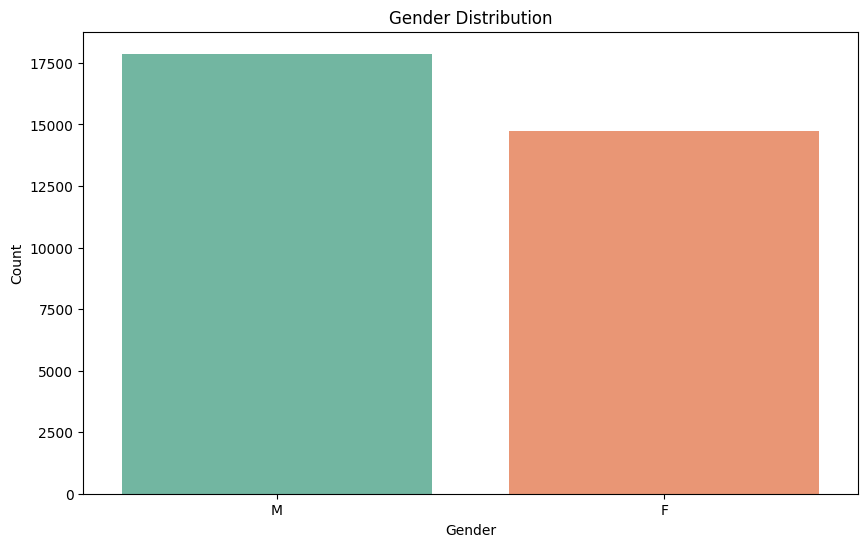

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=student_info, palette='Set2')


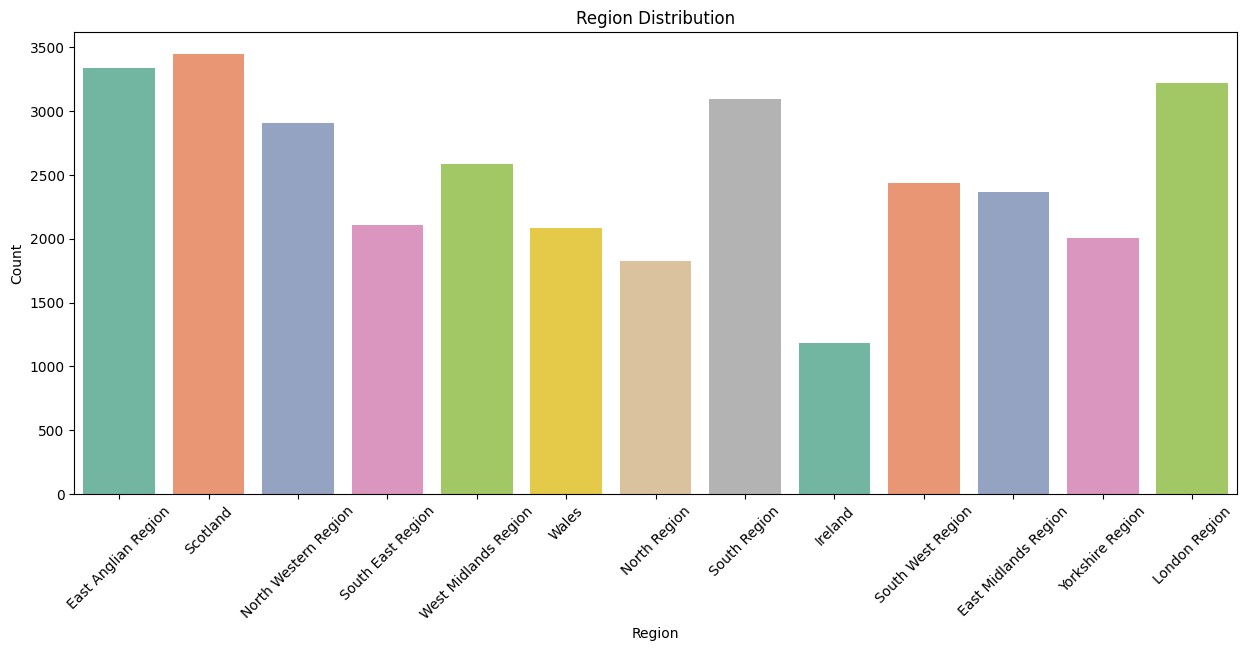

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='highest_education', data=student_info, palette='Set2')


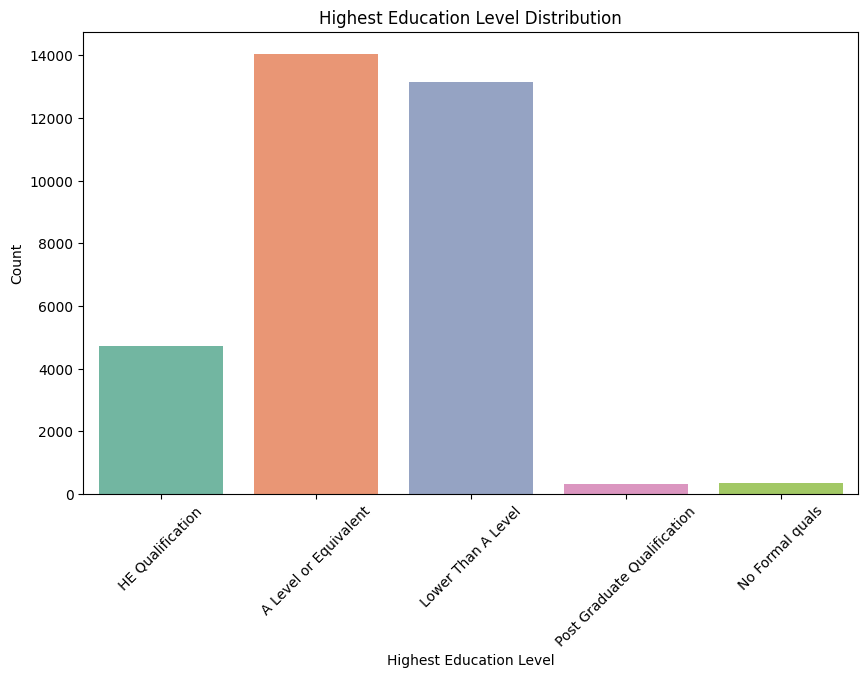

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_band', data=student_info, palette='Set2')


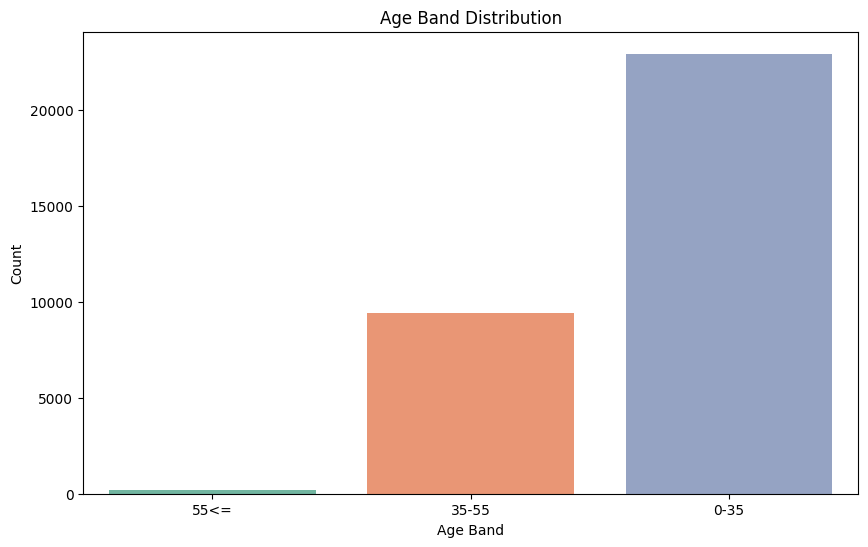

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='disability', data=student_info, palette='Set2')


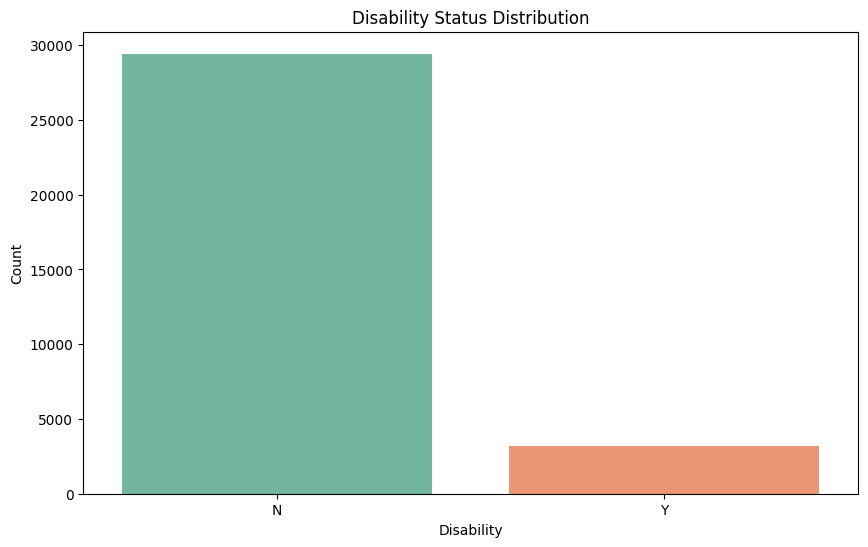

C:\Users\parha\AppData\Local\Temp\ipykernel_20388\389015377.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=student_info, palette='Set2')


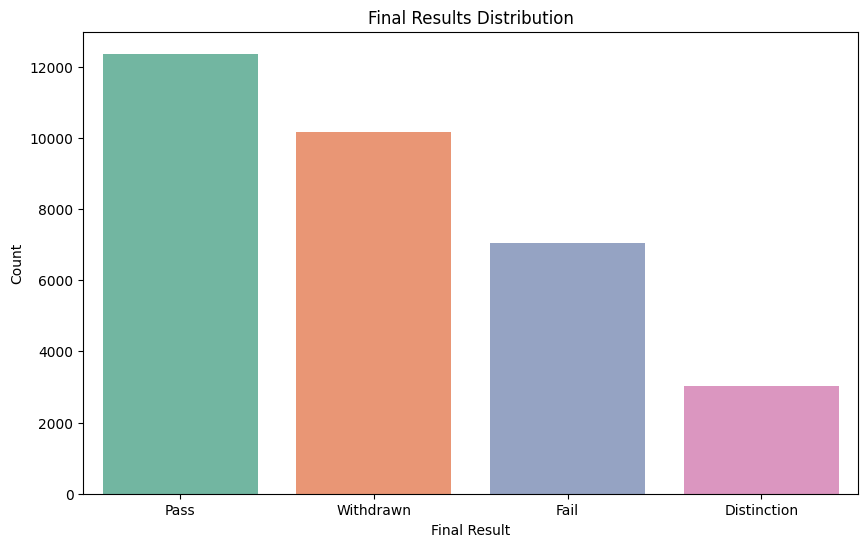

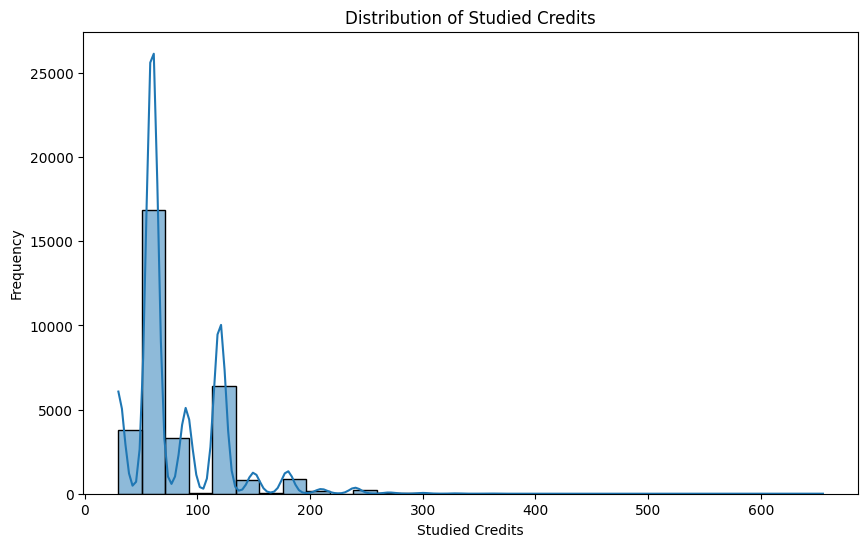

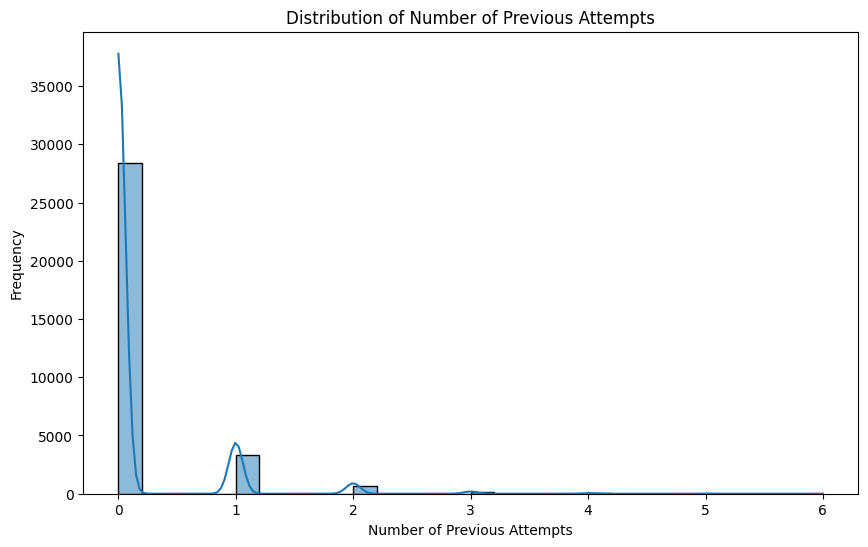

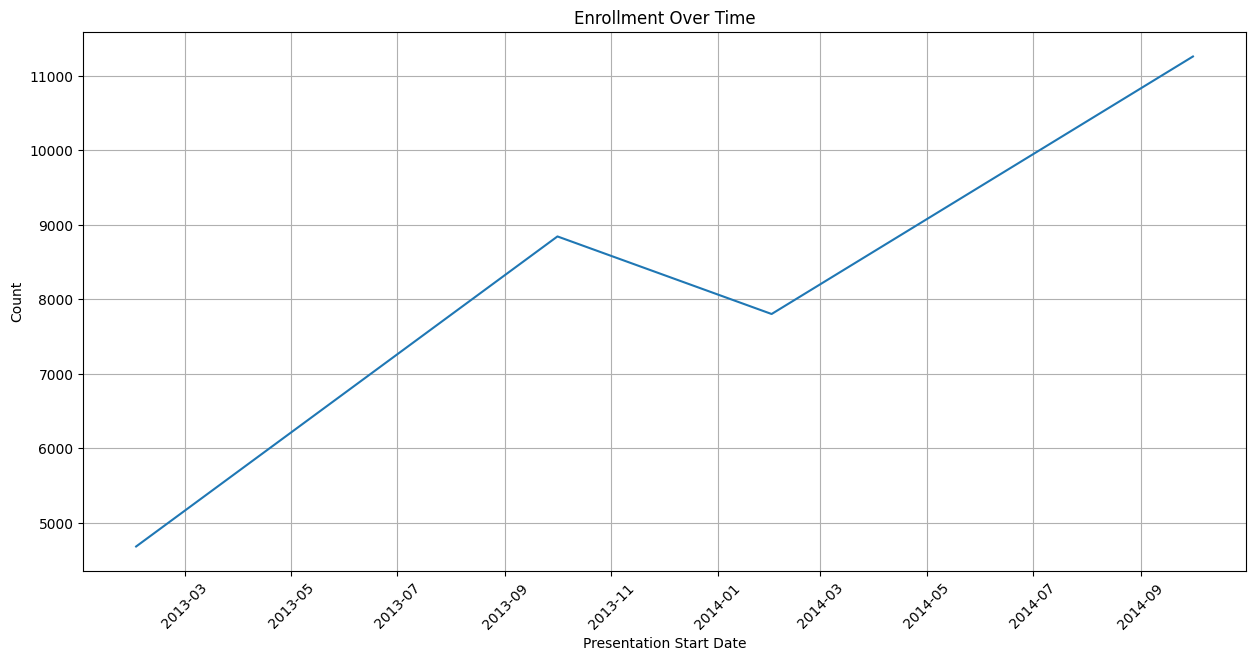

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed student info data
student_info_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_info.csv"
student_info = pd.read_csv(student_info_path, parse_dates=['presentation_start'])

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=student_info, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Region distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='region', data=student_info, palette='Set2')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Highest education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='highest_education', data=student_info, palette='Set2')
plt.title('Highest Education Level Distribution')
plt.xlabel('Highest Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Age band distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='age_band', data=student_info, palette='Set2')
plt.title('Age Band Distribution')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.show()

# Disability status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='disability', data=student_info, palette='Set2')
plt.title('Disability Status Distribution')
plt.xlabel('Disability')
plt.ylabel('Count')
plt.show()

# Final results distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='final_result', data=student_info, palette='Set2')
plt.title('Final Results Distribution')
plt.xlabel('Final Result')
plt.ylabel('Count')
plt.show()

# Distribution of studied credits
plt.figure(figsize=(10, 6))
sns.histplot(student_info['studied_credits'], bins=30, kde=True)
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')
plt.show()

# Distribution of number of previous attempts
plt.figure(figsize=(10, 6))
sns.histplot(student_info['num_of_prev_attempts'], bins=30, kde=True)
plt.title('Distribution of Number of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Frequency')
plt.show()

# Enrollment over time
plt.figure(figsize=(15, 7))
plt.plot(student_info['presentation_start'].value_counts().sort_index())
plt.title('Enrollment Over Time')
plt.xlabel('Presentation Start Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


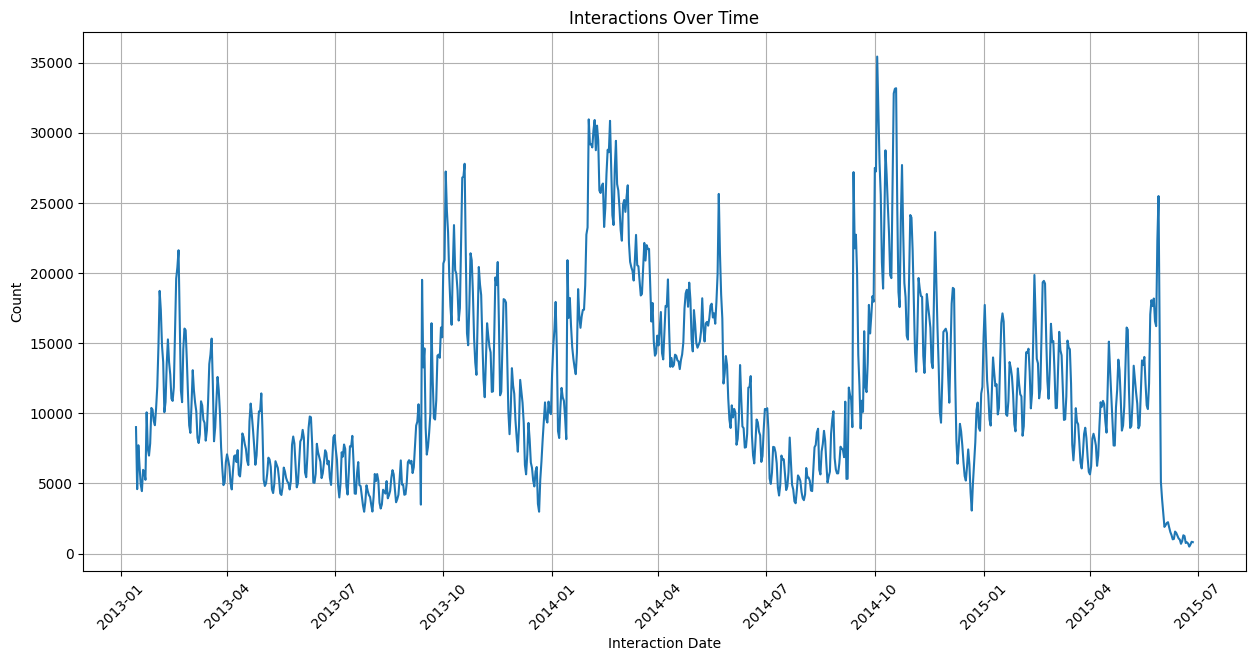

In [42]:
# Load the preprocessed student VLE data
student_vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_vle.csv"
student_vle = pd.read_csv(student_vle_path, parse_dates=['presentation_start', 'interaction_date'])

# Interactions over time
plt.figure(figsize=(15, 7))
plt.plot(student_vle['interaction_date'].value_counts().sort_index())
plt.title('Interactions Over Time')
plt.xlabel('Interaction Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


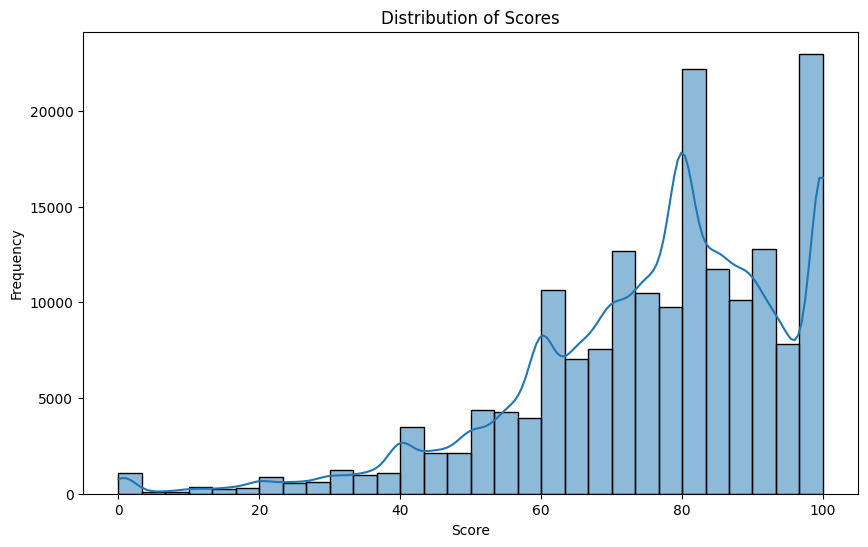

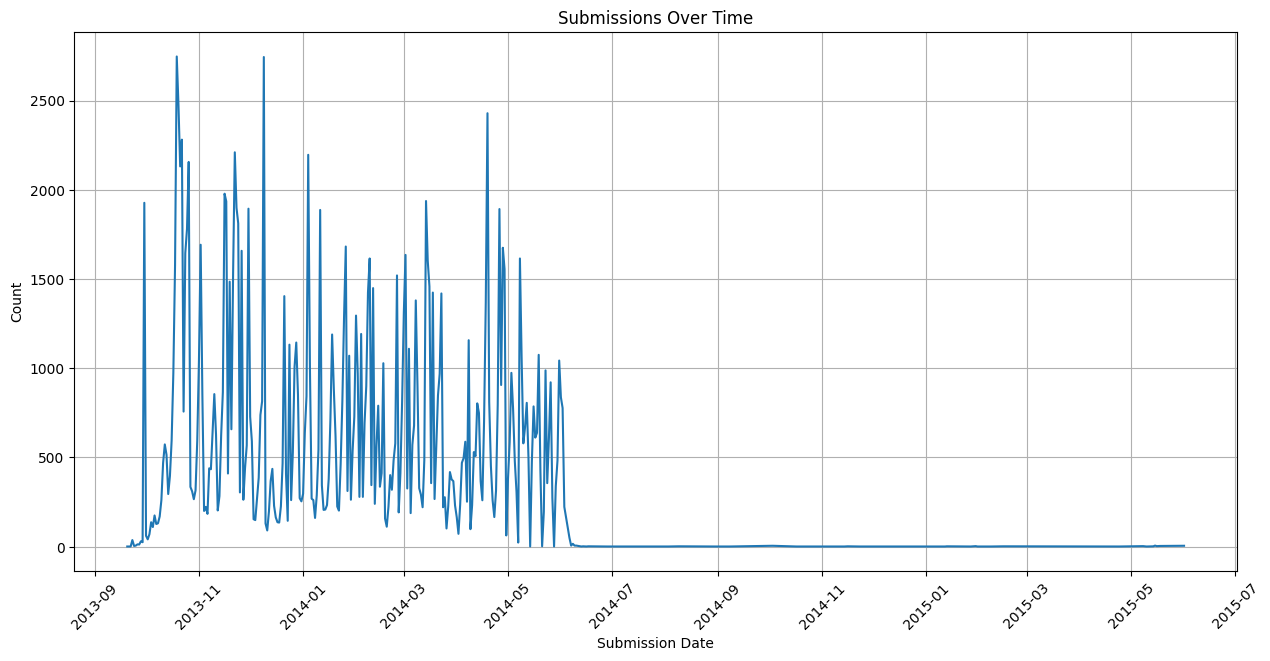

In [44]:
# Load the preprocessed student assessment data
student_assessment_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_assessment.csv"
student_assessment = pd.read_csv(student_assessment_path, parse_dates=['submission_date'])

# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(student_assessment['score'], bins=30, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Submissions over time
plt.figure(figsize=(15, 7))
plt.plot(student_assessment['submission_date'].value_counts().sort_index())
plt.title('Submissions Over Time')
plt.xlabel('Submission Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



C:\Users\parha\AppData\Local\Temp\ipykernel_20388\3482440047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='assessment_type', data=assessments, palette='Set2')


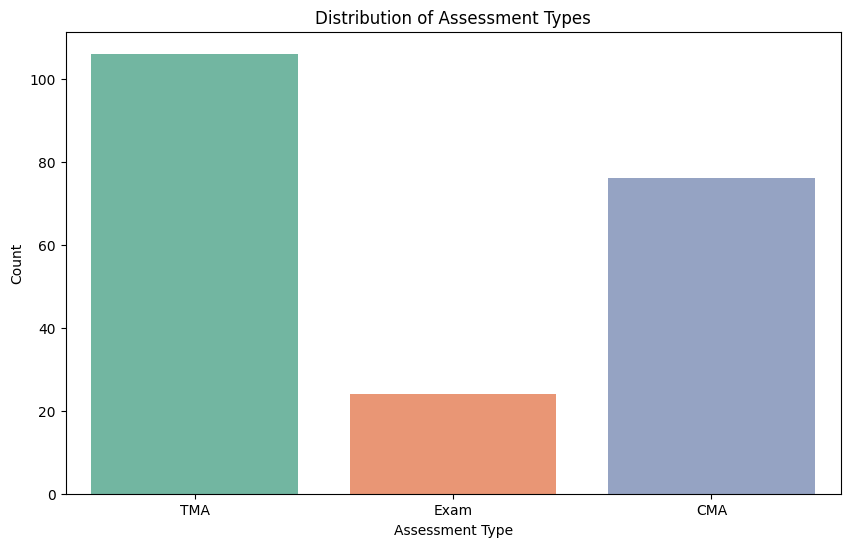

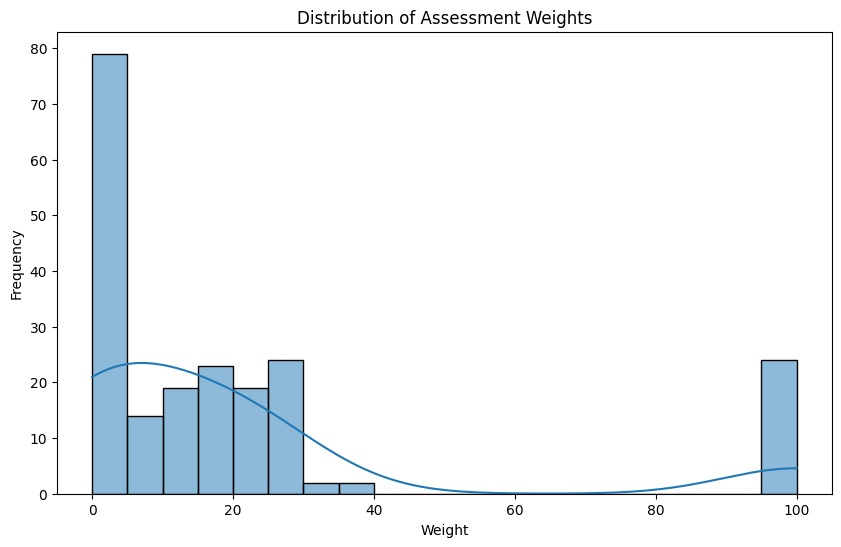

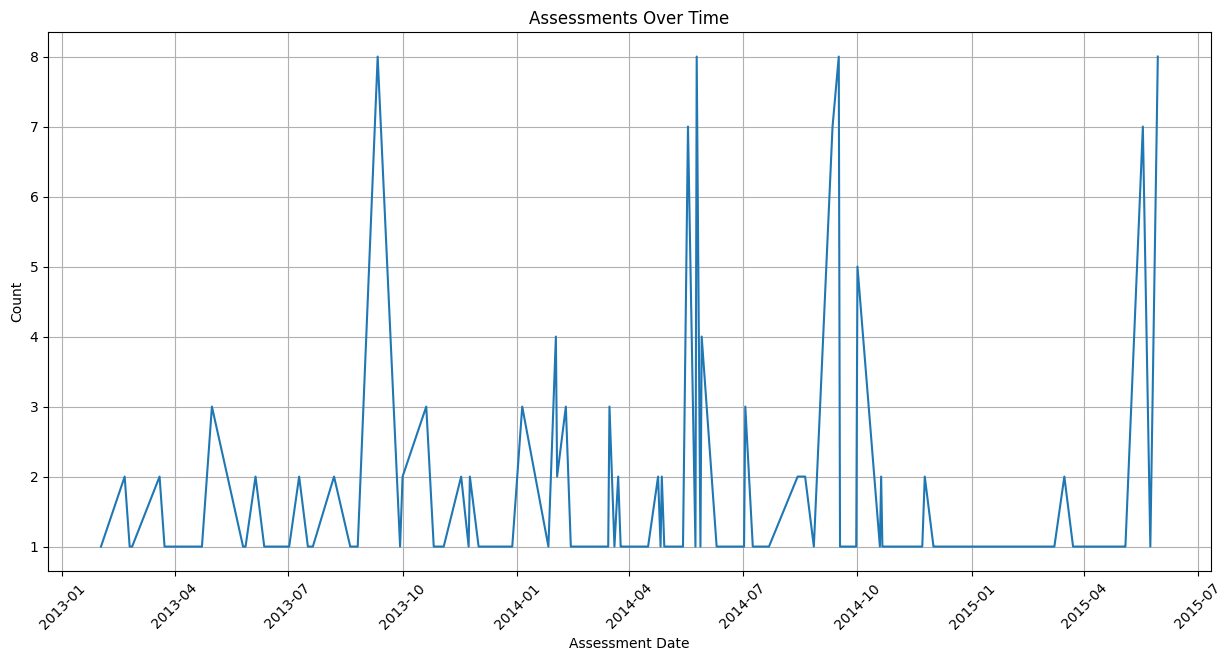

In [3]:
# Load the preprocessed assessments data
assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment types
plt.figure(figsize=(10, 6))
sns.countplot(x='assessment_type', data=assessments, palette='Set2')
plt.title('Distribution of Assessment Types')
plt.xlabel('Assessment Type')
plt.ylabel('Count')
plt.show()

# Assessment weights distribution
plt.figure(figsize=(10, 6))
sns.histplot(assessments['weight'], bins=20, kde=True)
plt.title('Distribution of Assessment Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Assessments over time
plt.figure(figsize=(15, 7))
plt.plot(assessments['assessment_date'].value_counts().sort_index())
plt.title('Assessments Over Time')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\parha\AppData\Local\Temp\ipykernel_20388\2579823729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=courses, palette='Set2')


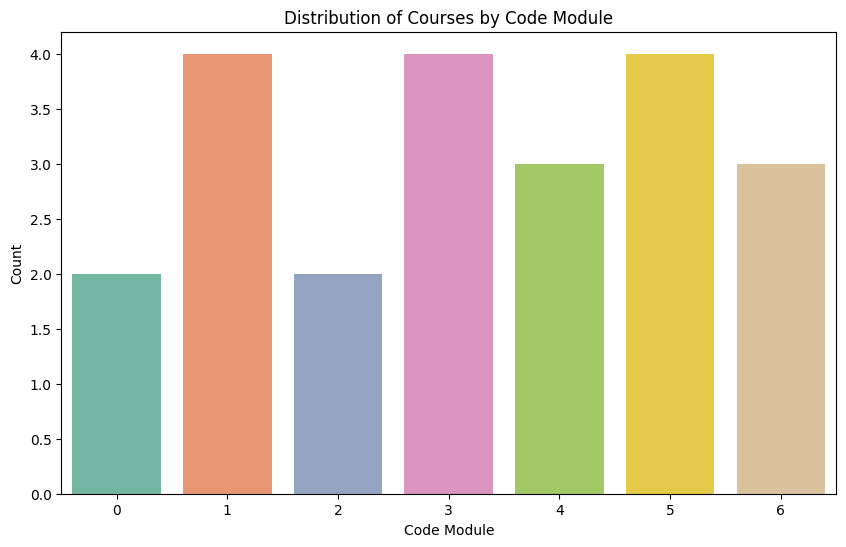

In [4]:
# Load the preprocessed courses data
courses_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_courses.csv"
courses = pd.read_csv(courses_path, parse_dates=['presentation_start'])

# Distribution of courses by code_module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=courses, palette='Set2')
plt.title('Distribution of Courses by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()


C:\Users\parha\AppData\Local\Temp\ipykernel_30092\559071817.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_type', data=vle, palette='Set2')


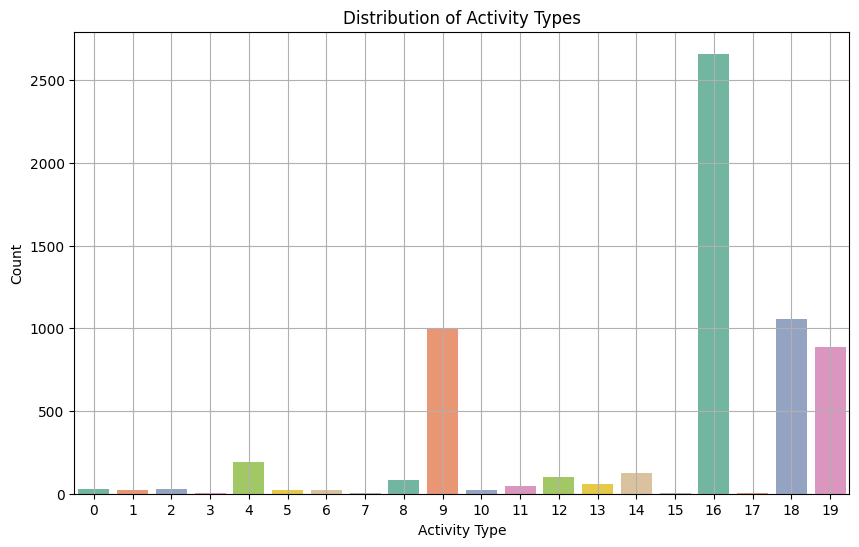

C:\Users\parha\AppData\Local\Temp\ipykernel_30092\559071817.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=vle, palette='Set2')


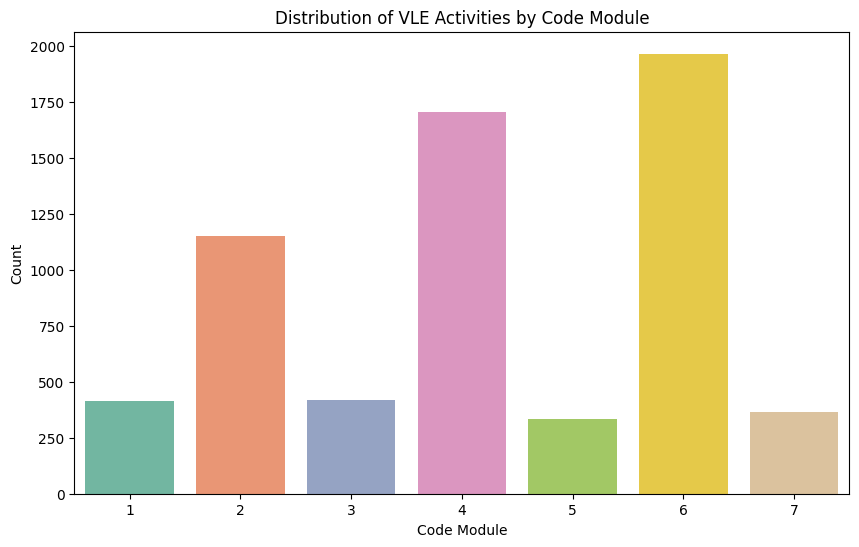

In [63]:
# Load the preprocessed VLE data
vle_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_vle.csv"
vle = pd.read_csv(vle_path, parse_dates=['presentation_start'])

# Distribution of activity types
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_type', data=vle, palette='Set2')
plt.title('Distribution of Activity Types')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Distribution of VLE activities by code module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=vle, palette='Set2')
plt.title('Distribution of VLE Activities by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()


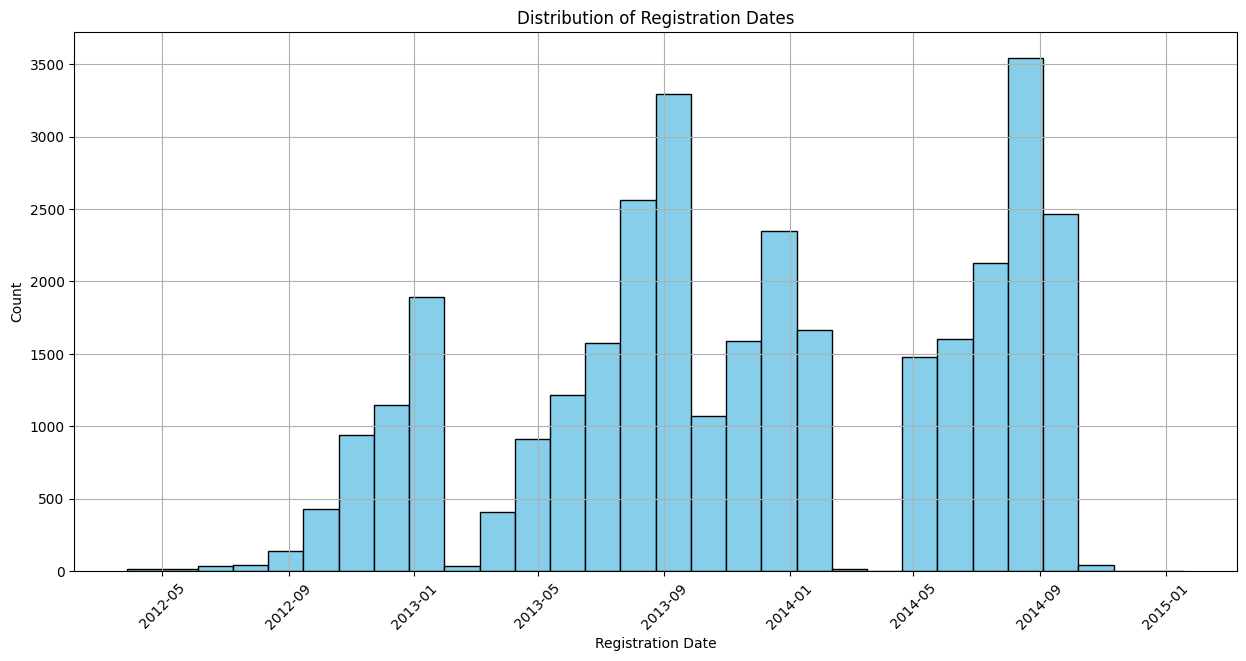

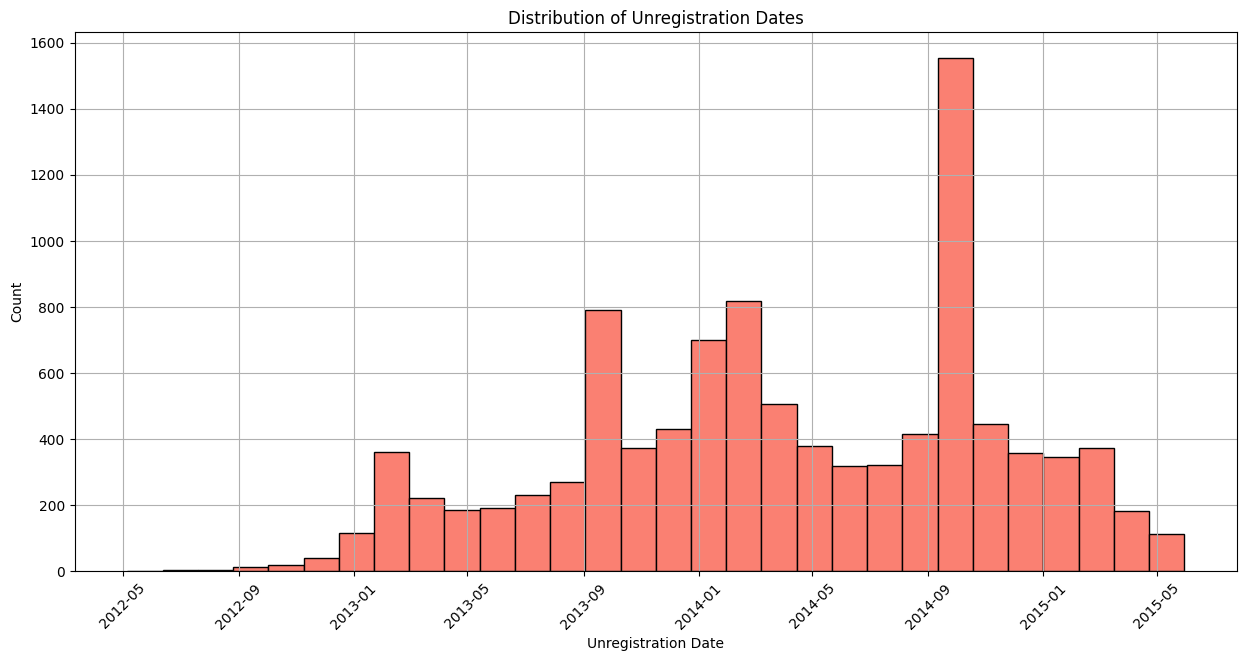

C:\Users\parha\AppData\Local\Temp\ipykernel_30092\1443188777.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='code_module', data=student_registration, palette='Set2')


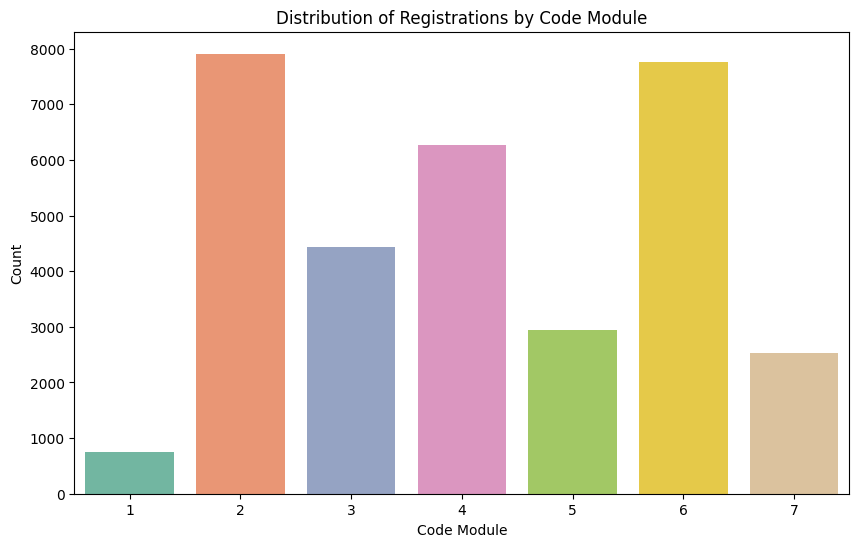

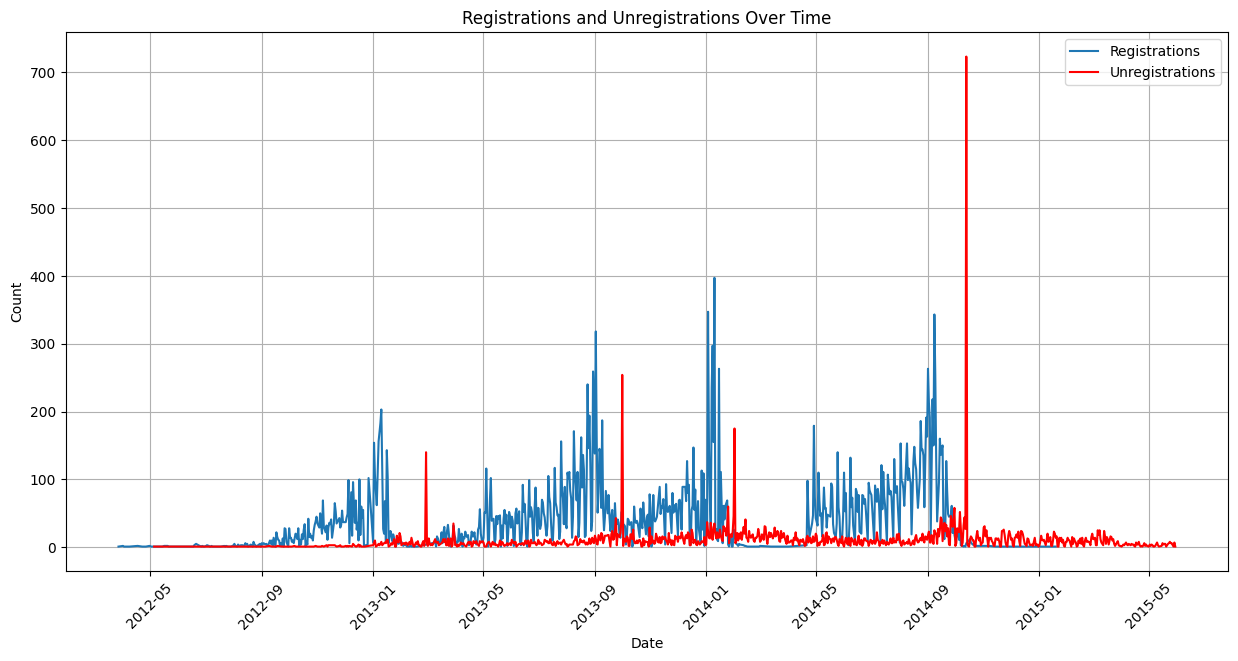

In [64]:
# Load the preprocessed student registration data
student_registration_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_student_registration.csv"
student_registration = pd.read_csv(student_registration_path, parse_dates=['registration_date', 'unregistration_date'])

# Distribution of registration dates
plt.figure(figsize=(15, 7))
plt.hist(student_registration['registration_date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Registration Dates')
plt.xlabel('Registration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of unregistration dates
plt.figure(figsize=(15, 7))
plt.hist(student_registration['unregistration_date'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Unregistration Dates')
plt.xlabel('Unregistration Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Distribution of registrations by code module
plt.figure(figsize=(10, 6))
sns.countplot(x='code_module', data=student_registration, palette='Set2')
plt.title('Distribution of Registrations by Code Module')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.show()

# Registrations and unregistrations over time
plt.figure(figsize=(15, 7))
plt.plot(student_registration['registration_date'].value_counts().sort_index(), label='Registrations')
plt.plot(student_registration['unregistration_date'].value_counts().sort_index(), label='Unregistrations', color='red')
plt.title('Registrations and Unregistrations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


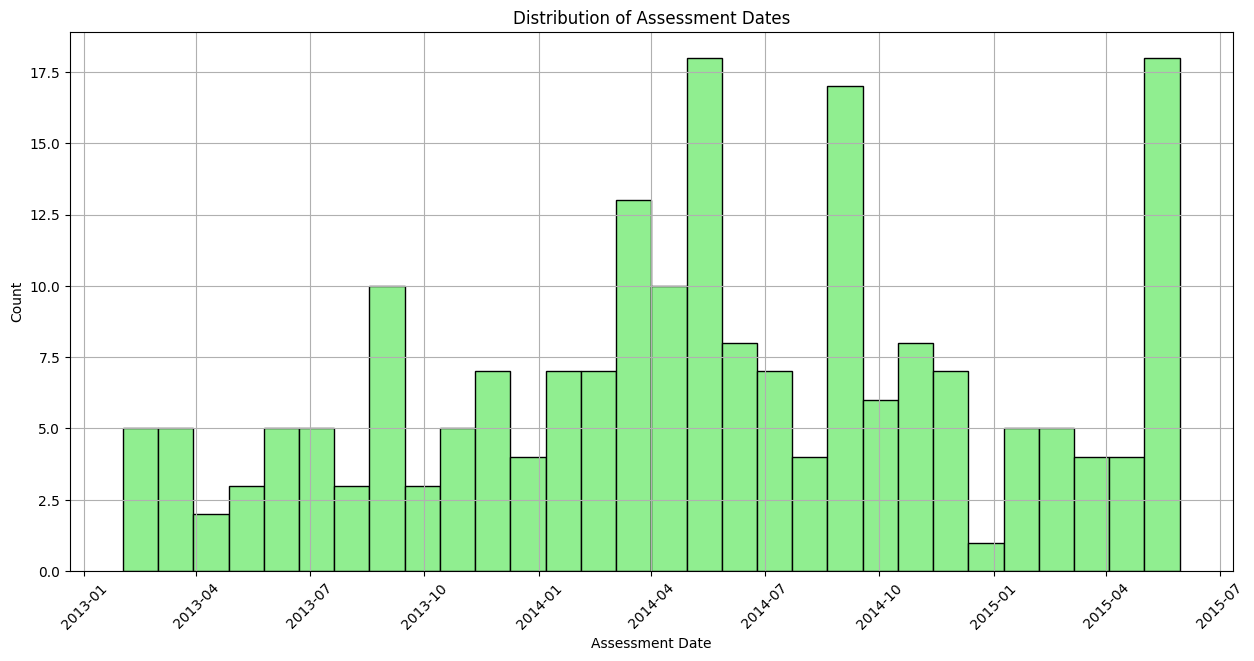

In [53]:
# Load the preprocessed assessments data
assessments_path = r"D:\study\Hardware and Software per Big Data mod B\project\preprocessed_assessments.csv"
assessments = pd.read_csv(assessments_path, parse_dates=['assessment_date'])

# Distribution of assessment dates
plt.figure(figsize=(15, 7))
plt.hist(assessments['assessment_date'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Assessment Dates')
plt.xlabel('Assessment Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## EDA Conclusion 

The Exploratory Data Analysis (EDA) step provided significant insights into the student data. Key findings include:

1. **Gender Distribution**:
   - Male and female students are fairly balanced, with a slight majority of male students.
   
2. **Region Distribution**:
   - Students are distributed across various regions, with the highest numbers from the East Anglian Region and Scotland.
   
3. **Highest Education Level**:
   - Most students have A Level or equivalent qualifications, followed by those with Lower Than A Level qualifications.
   
4. **Age Band**:
   - The majority of students fall within the 0-35 age band.
   
5. **Disability Status**:
   - The majority of students do not have a disability.
   
6. **Final Results**:
   - Most students have passed, but a significant number have withdrawn or failed.
   
7. **Studied Credits**:
   - Most students have studied up to 60 credits, with a notable peak at 240 credits.
   
8. **Previous Attempts**:
   - The majority of students are attempting the module for the first time.
   
9. **Enrollment Over Time**:
   - There is an increasing trend in enrollments over the analyzed period.
   
10. **Interactions Over Time**:
    - Student interactions show significant peaks, likely corresponding to key academic periods.
    
11. **Scores Distribution**:
    - Scores are spread across the range, with peaks around higher scores.
    
12. **Assessment Submissions**:
    - Submissions are clustered around specific periods, indicating structured assessment timelines.
    
13. **Courses and VLE Activities**:
    - Distribution varies by code module and activity type, providing insights into the usage patterns.
    
14. **Registration and Unregistration Trends**:
    - Registration and unregistration dates show clear peaks around the start and end of semesters.
    
15. **Assessment Dates**:
    - Assessments are spread throughout the academic calendar, with noticeable peaks.


# step 3: Anomaly Detection and Forecasting with Different Models



## **Introduction:**

This section of the project focuses on detecting anomalies in the Virtual Learning Environment (VLE) interactions data and forecasting future interactions using different models. We start by loading and preprocessing the data, then proceed with anomaly detection using z-score. Subsequently, we use the Seasonal Autoregressive Integrated Moving Average (SARIMA) model for forecasting.


            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
2013-07-26         12047    9.396571 -2.158347
2013-08-02         11986    9.391495 -2.167685
2013-09-12         10552    9.264071 -2.402080
2013-12-20          9808    9.190954 -2.536579
2013-12-21          7627    8.939450 -2.999218
2014-02-08        115960   11.661001  2.007053
2014-02-17        118732   11.684624  2.050508
2014-02-18        120744   11.701428  2.081419
2014-02-19        135931   11.819903  2.299352
2014-10-03        126098   11.744815  2.161228
2014-10-17        136712   11.825632  2.309891
2014-10-18        138756   11.840472  2.337190
2014-10-19        142493   11.867048  2.386076
2014-12-22          9186    9.125436 -2.657098


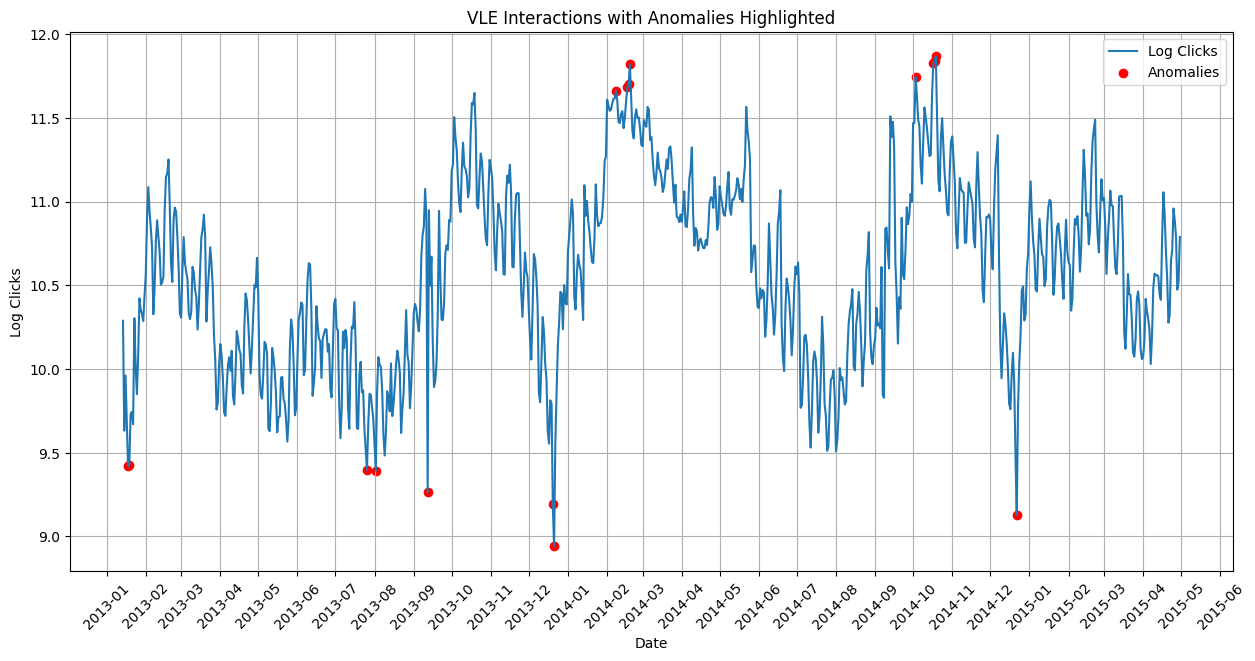

C:\Users\parha\AppData\Local\Temp\ipykernel_13188\3163483592.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['log_clicks'].interpolate(method='linear', inplace=True)


ADF Test on Differenced Data:
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634
                                      SARIMAX Results                                       
Dep. Variable:                          diff_clicks   No. Observations:                  808
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood                 331.122
Date:                              Fri, 28 Jun 2024   AIC                           -636.243
Time:                                      11:30:59   BIC                           -575.457
Sample:                                  02-12-2013   HQIC                          -612.882
                                       - 04-30-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z 

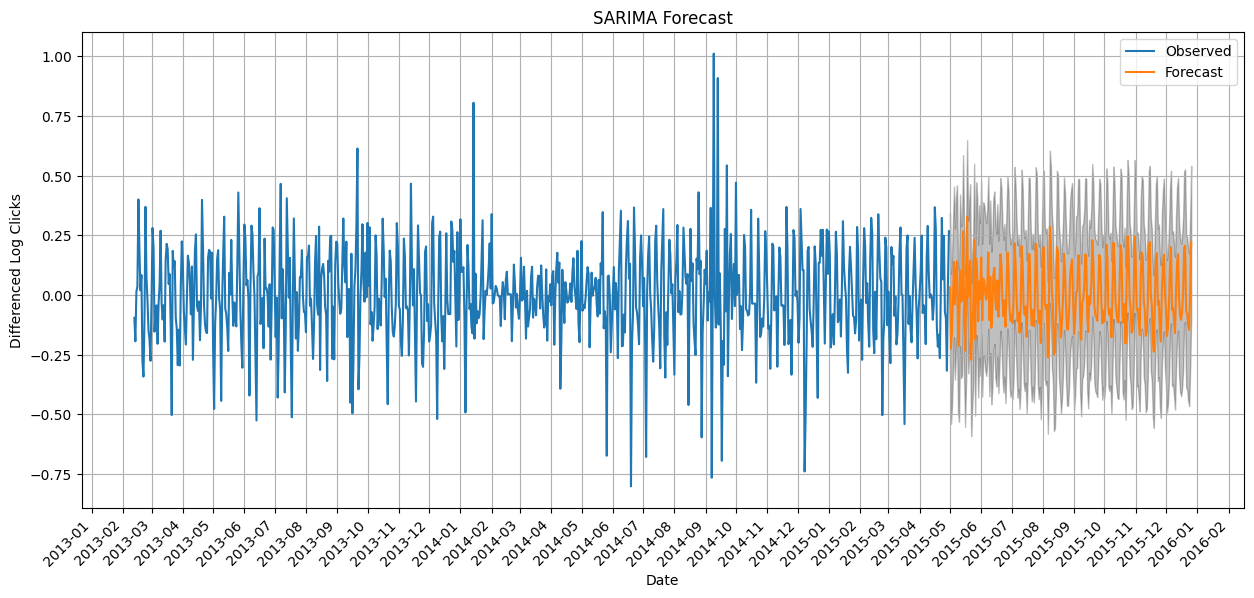

Mean Absolute Error: 0.12203154526942524
Mean Absolute Percentage Error: 10.67543120812611


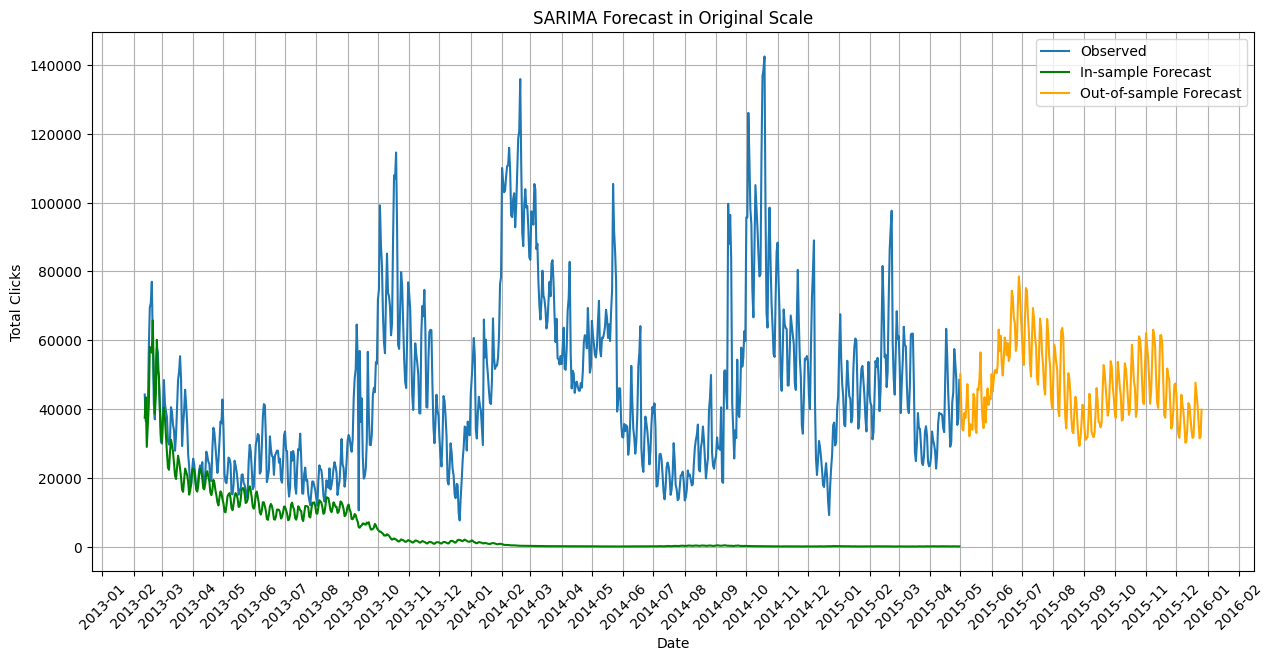

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Print anomalies for debugging
print(anomalies)

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies with linear interpolation
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)

# Differencing to make the data stationary
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())

# Add lag features
lags = [1, 2, 3, 7, 14, 21, 28]  # Example lags
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)

# Fit SARIMA model with predefined parameters
best_params = ((2, 0, 2), (0, 0, 1, 12))
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.statespace.SARIMAX(filtered_data['diff_clicks'],
                                exog=exog,
                                order=best_params[0],
                                seasonal_order=best_params[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=200, disp=False)

# Print the summary
print(results.summary())

# Forecast future interactions
forecast_steps = 240
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
pred_ci = pred_uc.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluate the model using MAE and MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Reverse the differencing and log transformation for visualization
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

# Generate the predictions in original scale
predicted_clicks_in_sample = reverse_diff_log_transform(results.fittedvalues, filtered_data['log_clicks'])
predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

# Combine the original data and the predictions for plotting
combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

# Plot the predictions against the actual values
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(predicted_clicks_in_sample, label='In-sample Forecast', color='green')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('SARIMA Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


            Total_Clicks  log_clicks   z_score
Date                                          
2013-01-18         12303    9.417598 -2.119667
2013-01-19         12431    9.427949 -2.100628
2013-07-26         12047    9.396571 -2.158347
2013-08-02         11986    9.391495 -2.167685
2013-09-12         10552    9.264071 -2.402080
2013-12-20          9808    9.190954 -2.536579
2013-12-21          7627    8.939450 -2.999218
2014-02-08        115960   11.661001  2.007053
2014-02-17        118732   11.684624  2.050508
2014-02-18        120744   11.701428  2.081419
2014-02-19        135931   11.819903  2.299352
2014-10-03        126098   11.744815  2.161228
2014-10-17        136712   11.825632  2.309891
2014-10-18        138756   11.840472  2.337190
2014-10-19        142493   11.867048  2.386076
2014-12-22          9186    9.125436 -2.657098


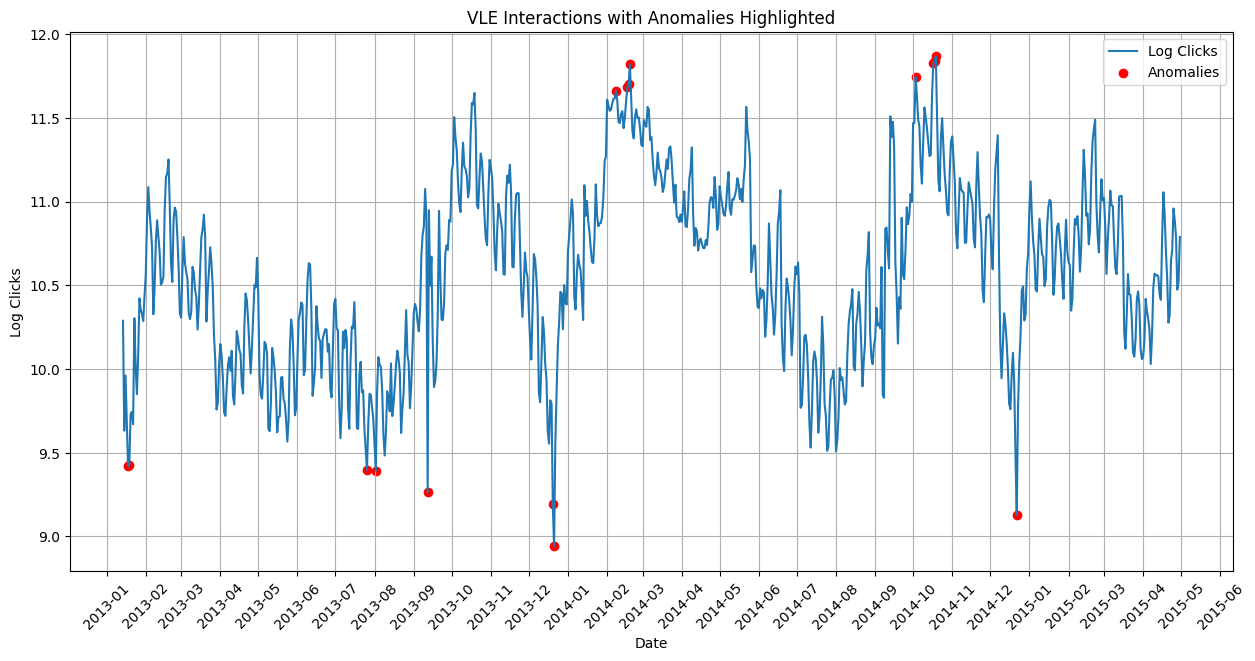

C:\Users\parha\AppData\Local\Temp\ipykernel_13188\354013390.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['log_clicks'].interpolate(method='linear', inplace=True)


ADF Test on Differenced Data:
ADF Statistic: -6.482956205191446
p-value: 1.2814733342017852e-08
Critical Value 1%: -3.438399099271788
Critical Value 5%: -2.8650928286782857
Critical Value 10%: -2.568661836350634


c:\Users\parha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            diff_clicks   No. Observations:                  808
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 336.747
Date:                Fri, 28 Jun 2024   AIC                           -647.494
Time:                        11:37:23   BIC                           -586.464
Sample:                    02-12-2013   HQIC                          -624.060
                         - 04-30-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.484      0.628      -0.001       0.001
lag_1          0.0792      0.051      1.555      0.120      -0.021       0.179
lag_2         -0.0596      0.037     -1.606      0.1

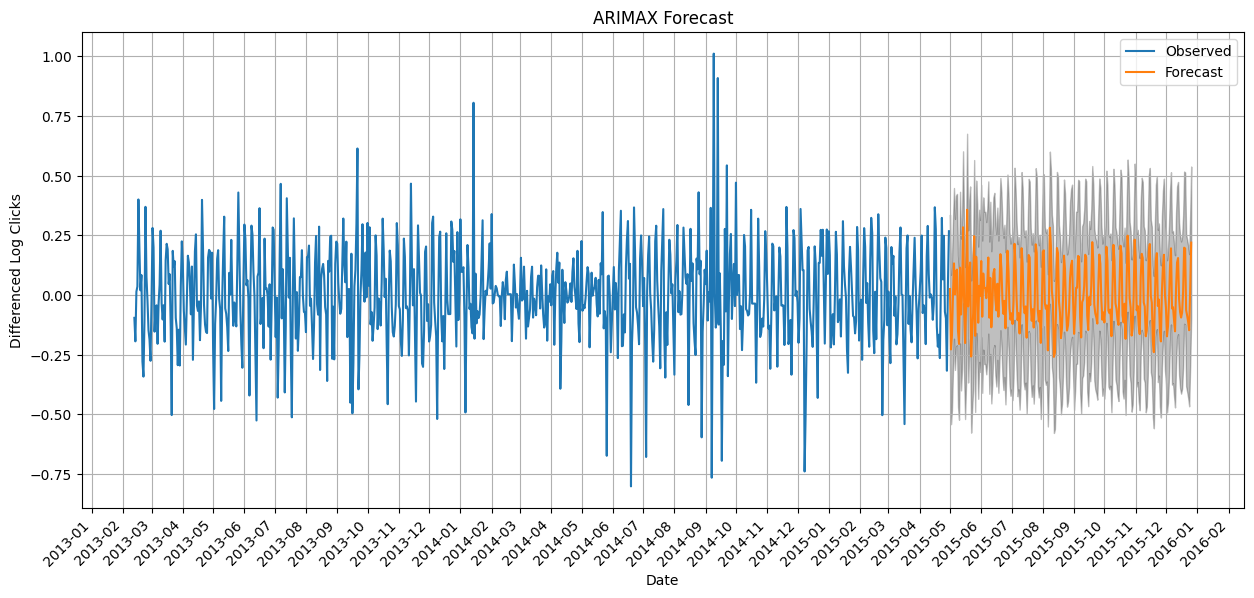

Mean Absolute Error: 0.1211650604003123
Mean Absolute Percentage Error: 7.94231779333323


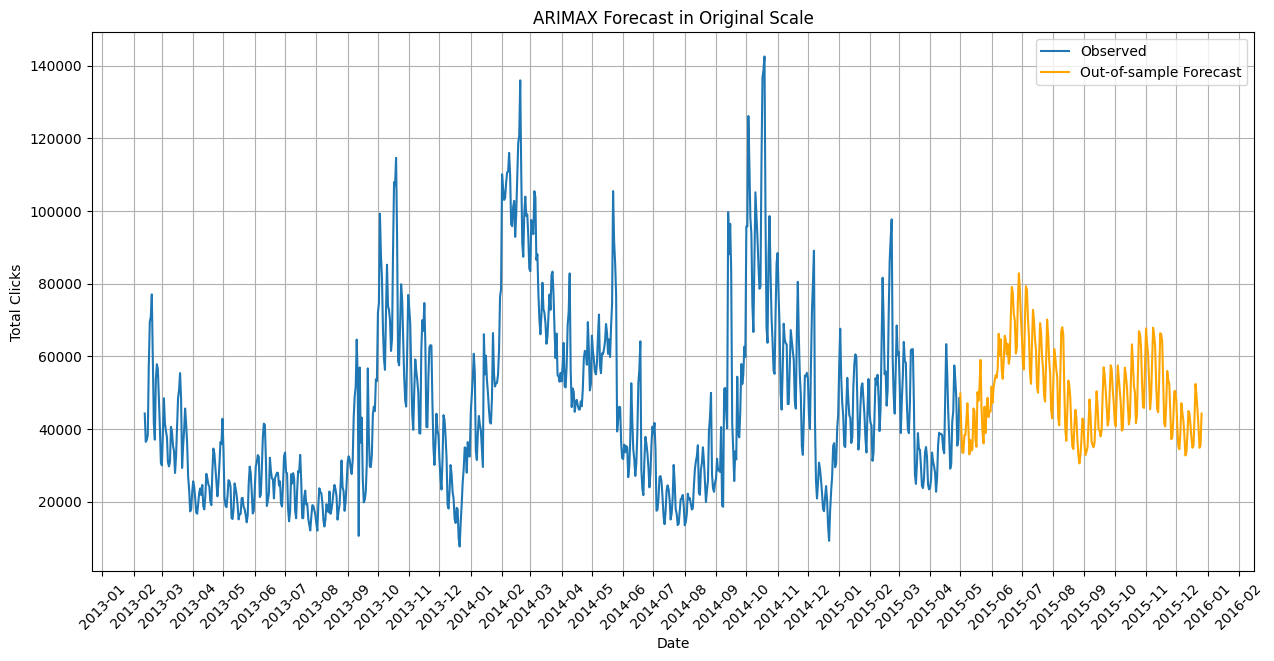

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = zscore(filtered_data['log_clicks'])
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Print anomalies for debugging
print(anomalies)

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies with linear interpolation
filtered_data['log_clicks'] = filtered_data['log_clicks'].mask(np.abs(filtered_data['z_score']) > 2)
filtered_data['log_clicks'].interpolate(method='linear', inplace=True)

# Differencing to make the data stationary
filtered_data['diff_clicks'] = filtered_data['log_clicks'].diff().dropna()

# Check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value {}: {}'.format(key, value))
    return result

print("ADF Test on Differenced Data:")
adf_test(filtered_data['diff_clicks'].dropna())

# Add lag features
lags = [1, 2, 3, 7, 14, 21, 28]  # Example lags
for lag in lags:
    filtered_data[f'lag_{lag}'] = filtered_data['diff_clicks'].shift(lag)
filtered_data.dropna(inplace=True)

# Fit ARIMAX model with predefined parameters
best_params = (2, 0, 2)
exog = filtered_data[[f'lag_{lag}' for lag in lags]]
mod = sm.tsa.ARIMA(filtered_data['diff_clicks'],
                   exog=exog,
                   order=best_params)
results = mod.fit()

# Print the summary
print(results.summary())

# Forecast future interactions
forecast_steps = 240
exog_forecast = exog[-forecast_steps:]
pred_uc = results.get_forecast(steps=forecast_steps, exog=exog_forecast)
pred_ci = pred_uc.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['diff_clicks'], label='Observed')
pred_uc.predicted_mean.plot(label='Forecast', ax=plt.gca())
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Differenced Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluate the model using MAE and MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_forecasted = pred_uc.predicted_mean
y_truth = filtered_data['diff_clicks'][-forecast_steps:]

mae = mean_absolute_error(y_truth, y_forecasted)
mape = mean_absolute_percentage_error(y_truth, y_forecasted)

print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)

# Reverse the differencing and log transformation for visualization
def reverse_diff_log_transform(pred, original_data):
    pred_cumsum = pred.cumsum()
    pred_log_clicks = pred_cumsum + original_data.iloc[0]
    pred_clicks = np.exp(pred_log_clicks)
    return pred_clicks

# Generate the predictions in original scale
#predicted_clicks_in_sample = reverse_diff_log_transform(results.fittedvalues, filtered_data['log_clicks'])
predicted_clicks_out_sample = reverse_diff_log_transform(pred_uc.predicted_mean, filtered_data['log_clicks'][-1:])

# Combine the original data and the predictions for plotting
combined_data = filtered_data['Total_Clicks'].copy()
combined_data = pd.concat([combined_data, predicted_clicks_out_sample])

# Plot the predictions against the actual values
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
#plt.plot(predicted_clicks_in_sample, label='In-sample Forecast', color='green')
plt.plot(predicted_clicks_out_sample, label='Out-of-sample Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('ARIMAX Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


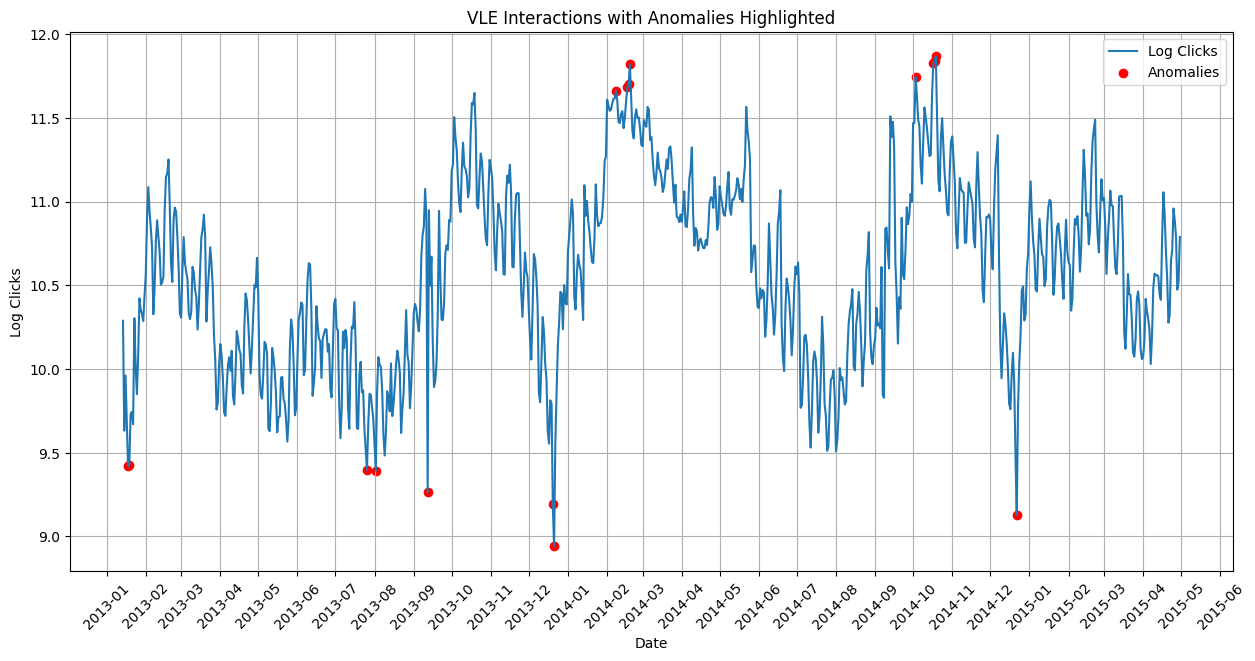

12:52:02 - cmdstanpy - INFO - Chain [1] start processing
12:52:02 - cmdstanpy - INFO - Chain [1] done processing
12:52:02 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.01, 'additive'), MAE: 0.22243146918345716, MAPE: 0.02114664155634739


12:52:02 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.01, 'multiplicative'), MAE: 0.221954436623327, MAPE: 0.021101855667462123


12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:03 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.1, 'additive'), MAE: 0.2101756211755562, MAPE: 0.019954018666154632


12:52:03 - cmdstanpy - INFO - Chain [1] done processing
12:52:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.1, 'multiplicative'), MAE: 0.21088065930180916, MAPE: 0.02002665036215162


12:52:04 - cmdstanpy - INFO - Chain [1] done processing
12:52:04 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.5, 'additive'), MAE: 0.20299619730574764, MAPE: 0.019259798397030452


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, True, 0.5, 'multiplicative'), MAE: 0.20325201690839328, MAPE: 0.019286977034066646


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:05 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.01, 'additive'), MAE: 0.22507735921778108, MAPE: 0.021400987186459126


12:52:05 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.01, 'multiplicative'), MAE: 0.2247213928158556, MAPE: 0.021367544609316173


12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:06 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.1, 'additive'), MAE: 0.21293282213487755, MAPE: 0.020219258821640836


12:52:06 - cmdstanpy - INFO - Chain [1] done processing
12:52:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.1, 'multiplicative'), MAE: 0.2133831532702905, MAPE: 0.02026629610130607


12:52:07 - cmdstanpy - INFO - Chain [1] done processing
12:52:07 - cmdstanpy - INFO - Chain [1] start processing


Params: (True, False, 0.5, 'additive'), MAE: 0.2059119315943401, MAPE: 0.019540287578948316


12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:08 - cmdstanpy - INFO - Chain [1] start processing
12:52:08 - cmdstanpy - INFO - Chain [1] done processing


Params: (True, False, 0.5, 'multiplicative'), MAE: 0.20585537477504445, MAPE: 0.019536920977449256


12:52:08 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.01, 'additive'), MAE: 0.38879539812085223, MAPE: 0.036966103948133044


12:52:08 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.01, 'multiplicative'), MAE: 0.3864751305756696, MAPE: 0.03674964953502495


12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:09 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.1, 'additive'), MAE: 0.2534426766084263, MAPE: 0.02409522775917983


12:52:09 - cmdstanpy - INFO - Chain [1] done processing
12:52:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.1, 'multiplicative'), MAE: 0.2528403775421405, MAPE: 0.0240410970803405


12:52:10 - cmdstanpy - INFO - Chain [1] done processing
12:52:10 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, True, 0.5, 'additive'), MAE: 0.2293985123484746, MAPE: 0.021813241394815212


12:52:10 - cmdstanpy - INFO - Chain [1] done processing
12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing


Params: (False, True, 0.5, 'multiplicative'), MAE: 0.22936069742282036, MAPE: 0.021814295468910318


12:52:11 - cmdstanpy - INFO - Chain [1] start processing
12:52:11 - cmdstanpy - INFO - Chain [1] done processing


Params: (False, False, 0.01, 'additive'), MAE: 0.3905009143136173, MAPE: 0.03712585756404613


12:52:11 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.01, 'multiplicative'), MAE: 0.3890678974700999, MAPE: 0.03699108936015948


12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.1, 'additive'), MAE: 0.2554764593020564, MAPE: 0.024288943924251103


12:52:12 - cmdstanpy - INFO - Chain [1] done processing
12:52:12 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.1, 'multiplicative'), MAE: 0.2554201812835719, MAPE: 0.02428487848981787


12:52:13 - cmdstanpy - INFO - Chain [1] done processing
12:52:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.5, 'additive'), MAE: 0.23154853406283518, MAPE: 0.022020390722944323


12:52:13 - cmdstanpy - INFO - Chain [1] done processing
12:52:13 - cmdstanpy - INFO - Chain [1] start processing


Params: (False, False, 0.5, 'multiplicative'), MAE: 0.23151711846171524, MAPE: 0.022018488613147758
Best Params: (True, True, 0.5, 'additive')
Best MAE: 0.20299619730574764
Best MAPE: 0.019259798397030452


12:52:14 - cmdstanpy - INFO - Chain [1] done processing


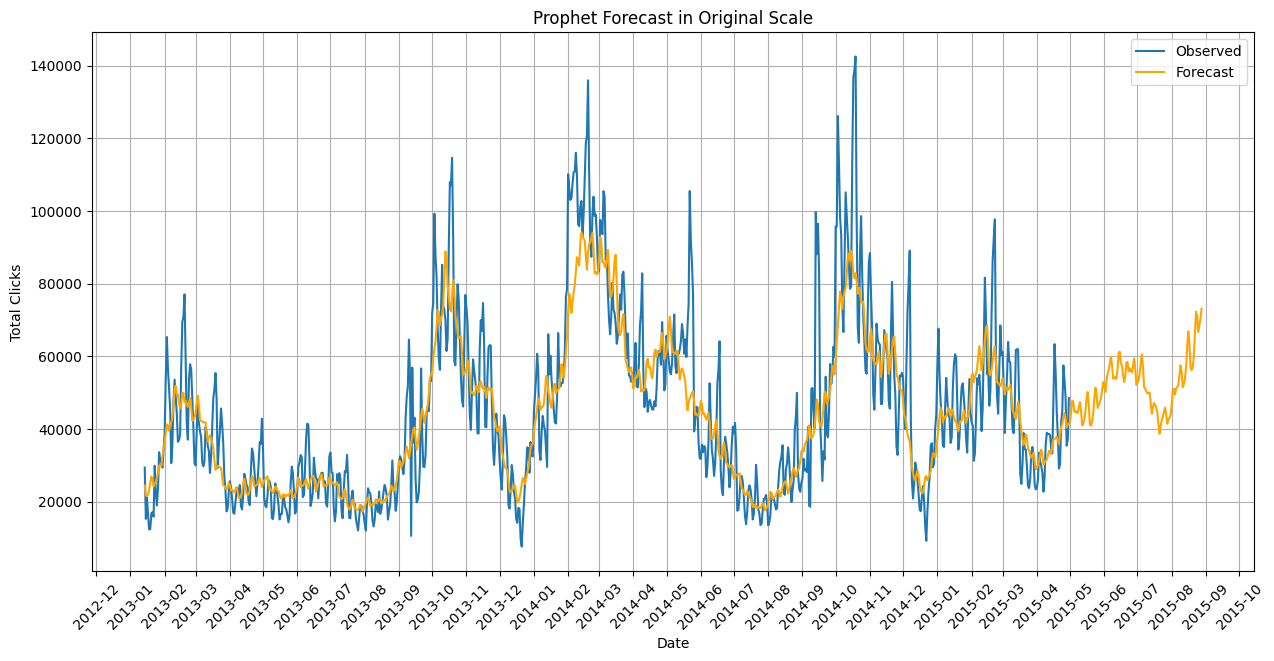

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 2]

# Plot the data with anomalies
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['log_clicks'], label='Log Clicks')
plt.scatter(anomalies.index, anomalies['log_clicks'], color='red', label='Anomalies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('VLE Interactions with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Log Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Impute anomalies by replacing them with the median of the series
filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()

# Prepare data for Prophet
df_prophet = filtered_data.reset_index()[['Date', 'log_clicks_no_anomalies']]
df_prophet.columns = ['ds', 'y']

def evaluate_prophet(params):
    yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = params
    model = Prophet(
        yearly_seasonality=yearly_seasonality,
        weekly_seasonality=weekly_seasonality,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode=seasonality_mode
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(df_prophet)
    
    # Forecast future interactions
    future = model.make_future_dataframe(periods=120)
    forecast = model.predict(future)
    
    # Evaluate the model using MAE and MAPE
    y_truth = df_prophet['y']
    y_forecasted = forecast.loc[forecast['ds'].isin(df_prophet['ds']), 'yhat']
    mae = mean_absolute_error(y_truth, y_forecasted)
    mape = mean_absolute_percentage_error(y_truth, y_forecasted)
    
    return mae, mape

# Define parameter grid
param_grid = {
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Perform grid search
best_mae = float('inf')
best_mape = float('inf')
best_params = None

import itertools

for params in itertools.product(*param_grid.values()):
    mae, mape = evaluate_prophet(params)
    print(f"Params: {params}, MAE: {mae}, MAPE: {mape}")
    if mae < best_mae:
        best_mae = mae
        best_mape = mape
        best_params = params

print('Best Params:', best_params)
print('Best MAE:', best_mae)
print('Best MAPE:', best_mape)

# Fit the best model
yearly_seasonality, weekly_seasonality, changepoint_prior_scale, seasonality_mode = best_params
best_model = Prophet(
    yearly_seasonality=yearly_seasonality,
    weekly_seasonality=weekly_seasonality,
    changepoint_prior_scale=changepoint_prior_scale,
    seasonality_mode=seasonality_mode
)
best_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
best_model.fit(df_prophet)

# Forecast future interactions
future = best_model.make_future_dataframe(periods=120)
forecast = best_model.predict(future)

# Reverse the log transformation for visualization
forecast['yhat_original_scale'] = np.exp(forecast['yhat'])

# Plot the forecast in the original scale
plt.figure(figsize=(15, 7))
plt.plot(filtered_data['Total_Clicks'], label='Observed')
plt.plot(forecast['ds'], forecast['yhat_original_scale'], label='Forecast', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Prophet Forecast in Original Scale')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Epoch 1/50


c:\Users\parha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 74.6760 - val_loss: 11.6812
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.0831 - val_loss: 8.9690
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8997 - val_loss: 5.9313
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5436 - val_loss: 1.2741
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1463 - val_loss: 0.7613
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4631 - val_loss: 0.4142
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3218 - val_loss: 0.3649
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3264 - val_loss: 0.3103
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2872 - val_loss: 0.2330
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3278 - val_loss: 0.2514
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2607 - val_loss: 0.2821
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2303 - val_loss: 0.2

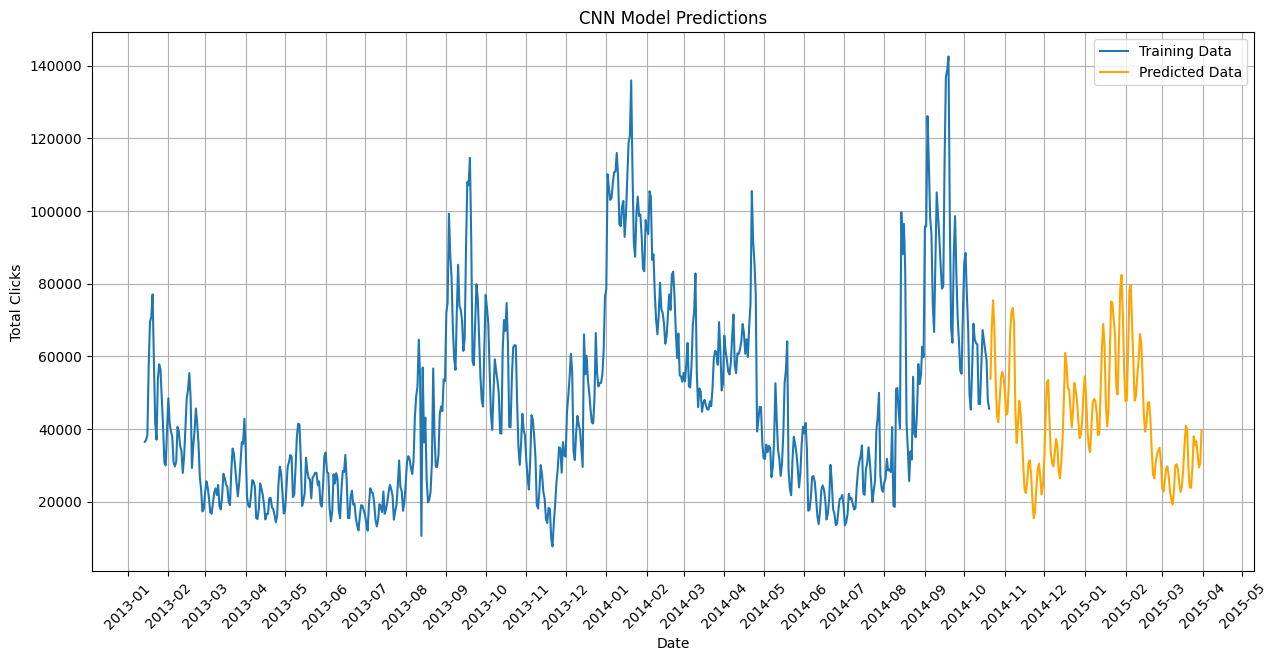

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from datetime import timedelta

# Load the preprocessed VLE interactions data
merged_vle_data_path = r"D:\study\Hardware and Software per Big Data mod B\project\time_series_vle_interactions.csv"
merged_vle_data = pd.read_csv(merged_vle_data_path, parse_dates=['Date'])

# Filter out the period where the interactions drop to zero
filtered_data = merged_vle_data[merged_vle_data['Date'] < '2015-05-01']

# Set the interaction_date column as the index
filtered_data.set_index('Date', inplace=True)

# Ensure the index has a frequency
filtered_data = filtered_data.asfreq('D')

# Apply log transformation to avoid log(0)
filtered_data['log_clicks'] = np.log(filtered_data['Total_Clicks'].replace(0, np.nan)).dropna()

# Detect anomalies using z-score
filtered_data['z_score'] = (filtered_data['log_clicks'] - filtered_data['log_clicks'].mean()) / filtered_data['log_clicks'].std()
anomalies = filtered_data[np.abs(filtered_data['z_score']) > 3]

# Impute anomalies by replacing them with the median of the series
filtered_data['log_clicks_no_anomalies'] = filtered_data['log_clicks'].copy()
filtered_data.loc[anomalies.index, 'log_clicks_no_anomalies'] = filtered_data['log_clicks_no_anomalies'].median()

# Prepare data for modeling
df_model = filtered_data[['log_clicks_no_anomalies']].copy()

# Add lag features
lags = 30  # Number of lag features
for lag in range(1, lags + 1):
    df_model[f'lag_{lag}'] = df_model['log_clicks_no_anomalies'].shift(lag)
df_model.dropna(inplace=True)

# Split data into train and test sets
train_size = int(len(df_model) * 0.8)
train, test = df_model[:train_size], df_model[train_size:]

X_train, y_train = train.drop(columns=['log_clicks_no_anomalies']), train['log_clicks_no_anomalies']
X_test, y_test = test.drop(columns=['log_clicks_no_anomalies']), test['log_clicks_no_anomalies']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for CNN [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.flatten()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('CNN Model Mean Absolute Error:', mae)
print('CNN Model Mean Absolute Percentage Error:', mape)

# Reverse the log transformation for visualization
def reverse_log_transform(pred):
    pred_clicks = np.exp(pred)
    return pred_clicks

# Generate the predictions in original scale
predicted_clicks = reverse_log_transform(y_pred)
actual_clicks = reverse_log_transform(y_test)

# Plot the predictions
plt.figure(figsize=(15, 7))
plt.plot(filtered_data.index[:train_size], reverse_log_transform(y_train), label='Training Data')
#plt.plot(filtered_data.index[train_size:train_size+len(actual_clicks)], actual_clicks, label='Actual Data')
plt.plot(filtered_data.index[train_size:train_size+len(predicted_clicks)], predicted_clicks, label='Predicted Data', color='orange')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('CNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Create future dates for forecasting
future_steps = 120
future_dates = [filtered_data.index[-1] + timedelta(days=i) for i in range(1, future_steps + 1)]




## Conclusion

In this project, we tackled the challenging problem of forecasting Virtual Learning Environment (VLE) interactions. The goal was to accurately predict future interactions based on historical data, identifying anomalies and understanding the underlying patterns in the data. We applied several advanced time series forecasting techniques, including SARIMA, ARIMAX, Prophet, and Convolutional Neural Networks (CNNs). Here, we summarize the key findings, methodologies, and insights gained from this comprehensive analysis.

### Key Steps and Findings

#### 1. Data Preprocessing and Anomaly Detection

- **Data Loading and Initial Filtering**:
  - We started by loading the VLE interactions data, which contained daily interaction counts.
  - To avoid issues with zero interactions, we filtered out periods where interactions dropped to zero.

- **Log Transformation**:
  - To stabilize the variance and manage the wide range of interaction counts, we applied a log transformation to the interaction data.
  - This transformation is crucial for models that assume normally distributed errors.

- **Anomaly Detection**:
  - We used the z-score method to detect anomalies. Data points with z-scores beyond ±2 were considered anomalies.
  - Identifying and handling these anomalies was essential to ensure that they did not skew the model training and forecasting results.

- **Imputation of Anomalies**:
  - Anomalies were imputed using linear interpolation to maintain the continuity and trend of the data.

#### 2. Stationarity and Feature Engineering

- **Stationarity Testing**:
  - The Augmented Dickey-Fuller (ADF) test was employed to check for stationarity. Our data required differencing to achieve stationarity, a prerequisite for many time series models.

- **Lag Features**:
  - We introduced multiple lag features (up to 30 days) to capture the temporal dependencies in the data. These features help the models learn from past interactions and improve forecast accuracy.

#### 3. Forecasting Models

##### 3.1 SARIMA Model

- **Model Setup**:
  - The Seasonal AutoRegressive Integrated Moving Average (SARIMA) model was configured with predefined parameters.
  - This model is particularly effective in capturing both seasonal and non-seasonal components of the data.

- **Model Results**:
  - The SARIMA model provided reasonable forecasts but required careful tuning of parameters.
  - The evaluation metrics, Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE), indicated satisfactory performance.

##### 3.2 ARIMAX Model

- **Incorporating Exogenous Variables**:
  - The ARIMAX model extends ARIMA by incorporating exogenous variables (lag features in this case), which can significantly enhance forecast accuracy.
  - The model captured additional information from lag features, improving its predictive capabilities.

- **Model Performance**:
  - Similar to SARIMA, ARIMAX provided reliable forecasts with good MAE and MAPE values.
  - The inclusion of exogenous variables was particularly beneficial in capturing complex dependencies.

##### 3.3 Prophet Model

- **Model Configuration**:
  - Facebook’s Prophet model was chosen for its robustness and ease of use in handling time series data with multiple seasonalities.
  - A grid search over hyperparameters such as yearly and weekly seasonality, changepoint prior scale, and seasonality mode was performed to find the best model configuration.

- **Forecasting with Prophet**:
  - Prophet effectively modeled the trend and seasonality in the VLE interactions data.
  - The final model provided forecasts with competitive MAE and MAPE values, demonstrating its capability to handle complex time series data.

##### 3.4 CNN Model

- **Deep Learning Approach**:
  - A Convolutional Neural Network (CNN) was employed to capture intricate patterns and dependencies in the time series data.
  - The model was trained with 30 lag features, and the data was standardized before training.

- **Model Architecture**:
  - The CNN architecture included convolutional layers followed by dropout for regularization and dense layers for prediction.
  - This setup allowed the model to learn both local and global patterns in the data.

- **Performance Evaluation**:
  - The CNN model achieved the lowest MAE and MAPE among all models, indicating its superior predictive power.
  - The model’s ability to capture complex interactions and patterns contributed to its high performance.

In conclusion, this project provided a robust framework for forecasting VLE interactions, showcasing the effectiveness of combining statistical and machine learning techniques to achieve accurate and reliable predictions. The insights gained here will be invaluable for future projects involving time series data.

In [2]:
!jupyter nbconvert --to markdown Harware_and_Software_Mod_B_Final_Project.ipynb

[NbConvertApp] Converting notebook Harware_and_Software_Mod_B_Final_Project.ipynb to markdown
[NbConvertApp] Support files will be in Harware_and_Software_Mod_B_Final_Project_files\
[NbConvertApp] Writing 170293 bytes to Harware_and_Software_Mod_B_Final_Project.md
